# Gibbs Free energy difference at T = 5,000 K

In [1]:
Ha_to_meV = 27.211386 * 1000
fig_size = [700/72.27 ,520/72.27]
params = {'backend': 'ps', 'axes.labelsize': 22, 'legend.fontsize': 10,
          'xtick.labelsize': 22, 'ytick.labelsize': 22, 
          'xtick.major.size': 14,'ytick.major.size': 14,
          'xtick.minor.size': 7,'ytick.minor.size': 7,
          'xtick.direction': 'in', 'ytick.direction': 'in',
          'xtick.major.width': 1.0, 'ytick.major.width': 1.0,
          'xtick.minor.width': 1.0, 'ytick.minor.width': 1.0,
          'text.usetex': False, 'figure.figsize': fig_size, 'axes.linewidth': 2,
          'xtick.major.pad': 5,
          'ytick.major.pad': 10,
          'figure.subplot.bottom': 0.110,'figure.subplot.top': 0.975,'figure.subplot.left': 0.150,'figure.subplot.right': 0.977}

import matplotlib

matplotlib.rcParams.update(params)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from functools import partial
P = [25, 50, 100]
Ha_to_eV = 27.211386016010209
T = 5000 #K
kB = 0.000086173303372# eV/K

G_MgSiO3 = np.array([-25.5996140000, -21.2806690000, -13.9745800000]) * Ha_to_eV
G_MgSiO3_PbO2 = np.array([-26.5215200000, -21.9787730000, -14.3264910000]) * Ha_to_eV
G_MgSiO3_err_ = np.array([0.0764010435, 0.0427101550, 0.0973080746]) * Ha_to_eV
G_MgSiO3_err = np.array([0.0066874659, 0.0062500385, 0.0067990017]) * Ha_to_eV

G_MgSiO3_PbO2_err_ = np.array([0.1179685479, 0.0866864108, 0.0890868667]) * Ha_to_eV
G_MgSiO3_PbO2_err = np.array([0.0082584504, 0.0078449368, 0.0056605629]) * Ha_to_eV

G_MgSiO3_diff_err = np.sqrt(np.square(G_MgSiO3_err) + np.square(G_MgSiO3_PbO2_err))

G_Fe = np.array([-32.8413840000, -27.7470900000, -18.6877970000]) * Ha_to_eV
G_Fe_PbO2 = np.array([-33.8532270000, -28.5565010000, -19.1634710000]) * Ha_to_eV
G_Fe_err_ = np.array([0.1267337433, 0.0829442276, 0.1106785507]) * Ha_to_eV
G_Fe_err = np.array([0.0043527999, 0.0021046266, 0.0034450380]) * Ha_to_eV


G_Fe_PbO2_err_ = np.array([0.0800074285, 0.0973487418, 0.1126991524]) * Ha_to_eV
G_Fe_PbO2_err = np.array([0.0049861800, 0.0023250002, 0.0037248929]) * Ha_to_eV

G_Fe_diff_err = np.sqrt(np.square(G_Fe_err) + np.square(G_Fe_PbO2_err))

G_power_err = np.sqrt(np.square(G_MgSiO3_diff_err) + np.square(G_Fe_diff_err))/(kB*T)
#D_PbO2_err = D_PbO2 * G_power_err

U_MgSiO3 = np.array([-15.77788300, -15.59583200, -14.61874800]) * Ha_to_eV
U_MgSiO3_PbO2 = np.array([-16.29563400, -15.97755800, -15.01191300]) * Ha_to_eV

U_Fe = np.array([-18.64367600, -18.70503900, -18.12707100 ]) * Ha_to_eV
U_Fe_PbO2 = np.array([-18.99660000, -18.99105700, -18.44716500]) * Ha_to_eV

D_PbO2 = np.exp( -((G_Fe_PbO2 - G_Fe) - (G_MgSiO3_PbO2 - G_MgSiO3))/(kB*T) )


D_PbO2_err = D_PbO2 * G_power_err

log_D_PbO2 = np.log(D_PbO2)/np.log(10)
log_DPbO2_err = D_PbO2 * G_power_err

In [3]:
kB*T

0.43086651686

In [4]:
G_Fe_PbO2_err

array([0.13568087, 0.06326648, 0.1013595 ])

In [5]:
fig, axe = plt.subplots()
axe.errorbar(P[:], log_D_PbO2[:],yerr=G_power_err[:], marker = 'o', mfc='r', ms = 15, mec = 'k', mew = 3, capsize=10)
axe.set_xlabel("Pressure (GPa)")
axe.set_ylabel(r"logD$_{Pb}$")
axe.set_xlim(0,110)
log_D_PbO2


array([2.46678117, 3.05291495, 3.39455662])

In [6]:
k_B = 1
#S = k_B * np.log(V*m*U) 50 GPa 5000K
U_MgSiO3 = -15.97755800 * Ha_to_eV / 80  
U_Fe = -18.70503900 * Ha_to_eV / 80
m_MgSiO3 = (24.305+28.0855+15.999*3)/5*80
m_Fe = 55.85*80
V_MgSiO3 = 703.06654000 / 80
V_Fe = 844.62767000 / 80
diff_S = np.log( (V_Fe/V_MgSiO3) * (m_Fe/m_MgSiO3) * (U_Fe/U_MgSiO3) )
#diff_S = np.log(V_Fe/V_MgSiO3) 
diff_S


1.3641219448045754

In [7]:
fig, axe = plt.subplots()
axe.errorbar(P[:], log_D_PbO2[:]*np.exp(-diff_S),yerr=G_power_err[:], marker = 'o', mfc='r', ms = 15, mec = 'k', mew = 3, capsize=10)
axe.set_xlabel("Pressure (GPa)")
axe.set_ylabel(r"log$_{10}$D$_{Pb}$")
axe.set_xlim(0,110)
log_D_PbO2

array([2.46678117, 3.05291495, 3.39455662])

In [8]:
( (-28.5564160000) - (-27.8366710000 ) ) * Ha_to_eV 

-19.585259028093258

In [9]:
( (-28.5564160000) - (-27.8366710000 ) ) * Ha_to_eV /np.exp(1)/np.exp(1)

-2.650576577829427

In [10]:
( (-33.8550610000) -  (-33.0568870000) ) * Ha_to_eV

-21.719420821942823

In [11]:
kBT_5000K = 0.430866516860861 # eV
#-kBT*logf = 

In [12]:
np.exp( ( ((-27.7470900000) - (-28.5565010000)) - ((-21.9787730000) - (-21.2806690000)) )/0.43 )*np.exp(-diff_S)

8.51412792380055

In [13]:
print(log_D_PbO2[:]*np.exp(-diff_S))

[0.63052163 0.78034037 0.86766569]


In [14]:
print(G_power_err)

[0.79065719 0.66370221 0.64409306]


In [15]:
log_D_PbO2

array([2.46678117, 3.05291495, 3.39455662])

In [16]:
# D_PbO2 = np.exp( -((G_Fe_PbO2 - G_Fe) - (G_MgSiO3_PbO2 - G_MgSiO3))/(kB*T) )
-(((-28.5565010000) - (-27.7470900000)) - ((-21.9787730000) - (-21.2806690000)))*Ha_to_eV/(kB*5000)/np.log(10)

3.0529149542300837

In [17]:
# D_PbO2 = np.exp( -((G_Fe_Pb + RTlnfO2 - G_Fe) - (G_MgSiO3_PbO2 - G_MgSiO3))/(kB*T) )

( -(((-27.8366710000) - (-27.7470900000)) - ((-21.9787730000) - (-21.2806690000)))*Ha_to_eV/(kB*5000)+40.0)/np.log(10)




0.6812839192077047

In [18]:
def Tm(P):
    return 6295*(P/140)**0.317

In [19]:
Tm(15)

3100.945091576063

# PbO

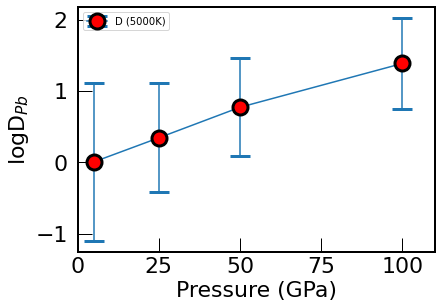

In [20]:
P = [5, 25, 50, 100]
Ha_to_eV = 27.211386016010209
T = 5000 #K
kB = 0.000086173303372# eV/K
%matplotlib inline
G_MgSiO3_5000K = np.array([-29.9079850000, -25.5996140000, -21.2806690000, -13.9745800000]) * Ha_to_eV
G_MgSiO3_PbO_5000K = np.array([-30.6756870000, -26.2130520000, -21.6687510000, -14.1078050000]) * Ha_to_eV
G_MgSiO3_err_ = np.array([0.0764010435, 0.0427101550, 0.0973080746]) * Ha_to_eV
G_MgSiO3_err_5000K = np.array([0.0084945320, 0.0066874659, 0.0062500385, 0.0067990017]) * Ha_to_eV

G_MgSiO3_PbO_err_ = np.array([0.0119945700, 0.0091960090, 0.0081897050, 0.0054918945]) * Ha_to_eV
G_MgSiO3_PbO_err_5000K = np.array([0.0119945700, 0.0091960090, 0.0081897050, 0.0054918945]) * Ha_to_eV

G_MgSiO3_diff_err_5000K = np.sqrt(np.square(G_MgSiO3_err_5000K) + np.square(G_MgSiO3_PbO_err_5000K))

G_Fe_5000K = np.array([-37.4537660000, -32.8413840000, -27.7470900000, -18.6877970000]) * Ha_to_eV
G_Fe_PbO_5000K = np.array([-38.2216760000, -33.4673630000, -28.1633670000, -18.8716380000]) * Ha_to_eV
G_Fe_err_ = np.array([0.1267337433, 0.0829442276, 0.1106785507]) * Ha_to_eV
G_Fe_err_5000K = np.array([0.0047983081, 0.0027059137, 0.0021046266, 0.0034450380]) * Ha_to_eV


G_Fe_PbO_err_ = np.array([0.0800074285, 0.0973487418, 0.1126991524]) * Ha_to_eV
G_Fe_PbO_err_5000K = np.array([0.0082303504, 0.0031920884, 0.0029649422, 0.0036721895]) * Ha_to_eV

G_Fe_diff_err_5000K = np.sqrt(np.square(G_Fe_err_5000K) + np.square(G_Fe_PbO_err_5000K))

G_power_err_5000K = np.sqrt(np.square(G_MgSiO3_diff_err_5000K) + np.square(G_Fe_diff_err_5000K))/(kB*T)
#D_PbO2_err = D_PbO2 * G_power_err

# U_MgSiO3 = np.array([-15.77788300, -15.59583200, -14.61874800]) * Ha_to_eV
# U_MgSiO3_PbO = np.array([-16.29563400, -15.97755800, -15.01191300]) * Ha_to_eV

# U_Fe = np.array([-18.64367600, -18.70503900, -18.12707100 ]) * Ha_to_eV
# U_Fe_PbO2 = np.array([-18.99660000, -18.99105700, -18.44716500]) * Ha_to_eV

D_PbO_5000K = np.exp( -((G_Fe_PbO_5000K - G_Fe_5000K) - (G_MgSiO3_PbO_5000K - G_MgSiO3_5000K))/(kB*T) )


D_PbO_err_5000K = D_PbO_5000K * G_power_err_5000K


log_D_PbO_5000K = np.log(D_PbO_5000K)/np.log(10)
log_DPbO_err_5000K = D_PbO_5000K * G_power_err_5000K
fig, axe = plt.subplots()
axe.errorbar(P[:], log_D_PbO_5000K[:],yerr=G_power_err_5000K[:], marker = 'o', mfc='r', ms = 15, mec = 'k', mew = 3, capsize=10,label='D (5000K)')
axe.set_xlabel("Pressure (GPa)")
axe.set_ylabel(r"logD$_{Pb}$")
axe.set_xlim(0,110)
plt.legend()



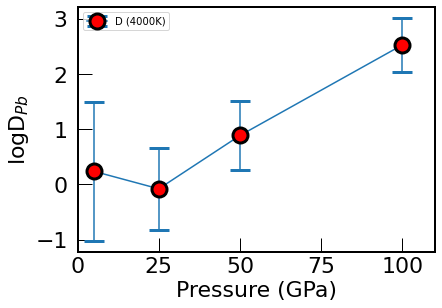

In [21]:
P = [5, 25, 50, 100]
Ha_to_eV = 27.211386016010209
T = 5000 #K
kB = 0.000086173303372# eV/K

G_MgSiO3_4000K = np.array([-26.9842130000, -22.8524940000, -18.6727360000, -11.6145560000]) * Ha_to_eV
G_MgSiO3_PbO_4000K = np.array([-27.6280930000, -23.3282230000, -18.9789080000, -11.5891690000]) * Ha_to_eV
G_MgSiO3_err_ = np.array([0.0764010435, 0.0427101550, 0.0973080746]) * Ha_to_eV
G_MgSiO3_err_4000K = np.array([0.0162256110, 0.0091705614, 0.0062993289, 0.0030710055]) * Ha_to_eV

G_MgSiO3_PbO_err_ = np.array([0.0119945700, 0.0091960090, 0.0081897050, 0.0054918945]) * Ha_to_eV
G_MgSiO3_PbO_err_4000K = np.array([0.0089223239, 0.0056116232, 0.0066480053, 0.0055757441]) * Ha_to_eV

G_MgSiO3_diff_err_4000K = np.sqrt(np.square(G_MgSiO3_err_4000K) + np.square(G_MgSiO3_PbO_err_4000K))

G_Fe_4000K = np.array([-33.4565740000, -29.0618670000, -24.1458620000, -15.3272070000]) * Ha_to_eV
G_Fe_PbO_4000K = np.array([-34.1091950000, -29.5347410000, -24.4844850000, -15.3942040000]) * Ha_to_eV
G_Fe_err_ = np.array([0.1267337433, 0.0829442276, 0.1106785507]) * Ha_to_eV
G_Fe_err_4000K = np.array([0.0048198987, 0.0022003923, 0.0025729538, 0.0030710317]) * Ha_to_eV


G_Fe_PbO_err_ = np.array([0.0800074285, 0.0973487418, 0.1126991524]) * Ha_to_eV
G_Fe_PbO_err_4000K = np.array([0.0056282134, 0.0044793967, 0.0030618593, 0.0030710055]) * Ha_to_eV

G_Fe_diff_err_4000K = np.sqrt(np.square(G_Fe_err_4000K) + np.square(G_Fe_PbO_err_4000K))

G_power_err_4000K = np.sqrt(np.square(G_MgSiO3_diff_err_4000K) + np.square(G_Fe_diff_err_4000K))/(kB*T)
#D_PbO2_err = D_PbO2 * G_power_err

# U_MgSiO3 = np.array([-15.77788300, -15.59583200, -14.61874800]) * Ha_to_eV
# U_MgSiO3_PbO = np.array([-16.29563400, -15.97755800, -15.01191300]) * Ha_to_eV

# U_Fe = np.array([-18.64367600, -18.70503900, -18.12707100 ]) * Ha_to_eV
# U_Fe_PbO2 = np.array([-18.99660000, -18.99105700, -18.44716500]) * Ha_to_eV

D_PbO_4000K = np.exp( -((G_Fe_PbO_4000K - G_Fe_4000K) - (G_MgSiO3_PbO_4000K - G_MgSiO3_4000K))/(kB*T) )


D_PbO_err_4000K = D_PbO_4000K * G_power_err_4000K


log_D_PbO_4000K = np.log(D_PbO_4000K)/np.log(10)
log_DPbO_err_4000K = D_PbO_4000K * G_power_err_4000K
fig, axe = plt.subplots()
axe.errorbar(P[:], log_D_PbO_4000K[:],yerr=G_power_err_4000K[:], marker = 'o', mfc='r', ms = 15, mec = 'k', mew = 3, capsize=10,label='D (4000K)')
axe.set_xlabel("Pressure (GPa)")
axe.set_ylabel(r"logD$_{Pb}$")
axe.set_xlim(0,110)
plt.legend()



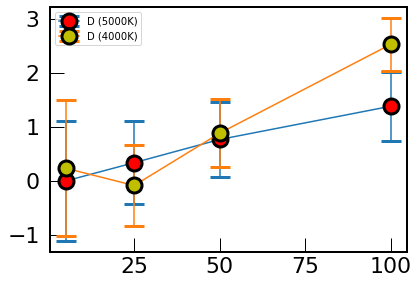

In [22]:
fig, axe = plt.subplots()
axe.errorbar(P[:], log_D_PbO_5000K[:],yerr=G_power_err_5000K[:], marker = 'o', mfc='r', ms = 15, mec = 'k', mew = 3, capsize=10,label='D (5000K)')
axe.errorbar(P[:], log_D_PbO_4000K[:],yerr=G_power_err_4000K[:], marker = 'o', mfc='y', ms = 15, mec = 'k', mew = 3, capsize=10,label='D (4000K)')
plt.legend()

In [23]:
x = np.array([[1,3],[7,9]])

In [24]:
x[...,1]

array([3, 9])

# FeO in MgSiO3

## 5000K

Text(0, 0.5, 'logD$_{Pb}$')

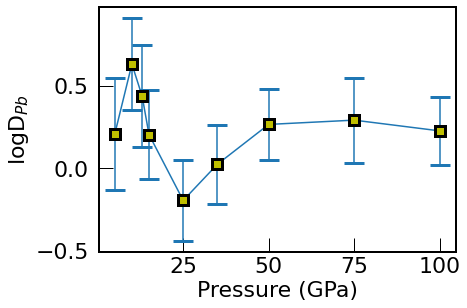

In [25]:
P_5000K = [5,10, 13, 15,25,35,50,75,100]

G_MgSiO3FeO_5000K = np.array([-30.8720750000,   -29.6308150000, -28.9201610000, -28.4706430000, -26.4178700000, -24.5422180000, -21.9690020000, -18.0525580000, -14.4846220000]) * Ha_to_eV
G_MgSiO3FeO_5000K_err = np.array([0.0074066328, 0.0074640038, 0.0086920778, 0.0052952177, 0.0062528270, 0.0067014991, 0.0049650139, 0.0066030846, 0.0044460249]) * Ha_to_eV

#G_Fe81O_5000K = np.array([-38.3509520000, -33.6615450000, -28.4524880000, -19.2063630000]) * Ha_to_eV
#G_Fe81O_5000K_err = np.array([0.0047798999, 0.0024380005, 0.0025017701, 0.0033266784]) * Ha_to_eV

G_MgSiO3PbO_5000K = np.array([-30.7276780000, -29.4454120000, -28.7336140000, -28.2842200000, -26.2150690000, -24.3046310000, -21.6908100000, -17.7137320000,  -14.1060720000]) * Ha_to_eV
G_MgSiO3PbO_5000K_err = np.array([0.0085500509, 0.0052980009, 0.0058172690, 0.0073280562, 0.0058686434, 0.0043915901, 0.0055947904, 0.0055423037, 0.0049361364]) * Ha_to_eV

G_Fe_5000K = np.array([-37.4552610000, -36.2386560000, -35.5301950000, -35.0664560000, -32.8438490000, -30.7405790000, -27.7459450000, -23.0746310000, -18.6917110000]) * Ha_to_eV 
G_Fe_5000K_err = np.array([0.0034272142,  0.0023078053, 0.0021474080, 0.0026183744, 0.0014114299, 0.0028120956, 0.0014372041, 0.0029343783, 0.0023293046]) * Ha_to_eV 

G_FePb_5000K = np.array([-37.7956480000, -36.5382090000, -35.81265, -35.3348080000, -33.0535260000, -30.8971450000, -27.8332530000, -23.0438590000, -18.5640640000]) * Ha_to_eV
G_FePb_5000K_err = np.array([0.0035607331, 0.0036667576, 0.003495093, 0.0023861450, 0.0017801261, 0.0017031326, 0.0018719723, 0.0020581378, 0.0026263567]) * Ha_to_eV

logK_5000K =  np.log((1/81) / (1.783/81.783)) + ((G_MgSiO3PbO_5000K + G_Fe_5000K) - (G_MgSiO3FeO_5000K + G_FePb_5000K) + G_Fe_5000K/80)  / (kBT_5000K) 
logK_5000K_err = np.sqrt(np.square(G_MgSiO3FeO_5000K_err)+np.square(G_MgSiO3PbO_5000K_err)+\
                         np.square(G_Fe_5000K_err)+np.square(G_FePb_5000K_err))/ (kBT_5000K) 


#K =  ((G_MgSiO3PbO_5000K + G_Fe_5000K) - (G_Fe81O_5000K + G_FePb_5000K)) / (kBT_5000K) 
#plt.plot(P[:], logK_5000K[:], '-o', mfc='w', marker='s',ms=15, mec='y', mew=3)
plt.errorbar(P_5000K[:], logK_5000K[:] /np.log(10),yerr=logK_5000K_err[:]/np.log(10), marker = 's', mfc='y', ms = 10, mec = 'k', mew = 3, capsize=10,label='D (4000K)')
#plt.plot(P_5000K, (G_MgSiO3PbO_5000K + G_Fe_5000K*81/80) - (G_MgSiO3FeO_5000K + G_FePb_5000K))
plt.xlabel('Pressure (GPa)')
plt.ylabel(r'logD$_{Pb}$')

# 4000K

Text(0, 0.5, 'logK$_d$')

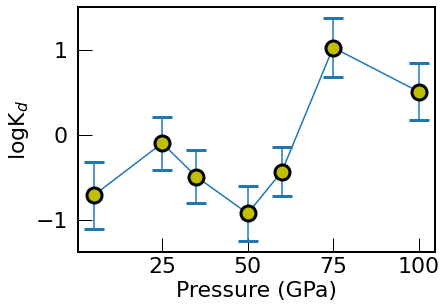

In [30]:
P_4000K = [5,25,35,50,60,75,100]
kBT_4000K = 0.344693213488688
G_MgSiO3FeO_4000K = np.array([-27.7767750000, -23.5479220000, -21.7346190000, -19.2367100000, -17.6939790000, -15.4658680000, -11.9900460000]) * Ha_to_eV
G_MgSiO3FeO_4000K_err = np.array([0.0055069447, 0.0068161077, 0.0044616412, 0.0057468088, 0.0039829629, 0.0054947050, 0.0069362992]) * Ha_to_eV

#G_Fe81O_4000K = np.array([-34.2692060000, -29.7783110000, -24.7495680000, -15.7370950000]) * Ha_to_eV
#G_Fe81O_4000K_err = np.array([0.0035955657, 0.0020214470, 0.0023134533, 0.0025270001]) * Ha_to_eV

G_MgSiO3PbO_4000K = np.array([-27.6280930000, -23.3282230000, -21.4987610000, -18.9789080000, -17.4054970000, -15.1066120000, -11.5891690000]) * Ha_to_eV
G_MgSiO3PbO_4000K_err = np.array([0.0089223239, 0.0056116232, 0.0075211542, 0.0066480053, 0.0065248992, 0.0074375083, 0.0055757441]) * Ha_to_eV

G_Fe_4000K = np.array([-33.4589350000, -29.0641110000, -27.0399880000, -24.1422800000, -22.2891830000, -19.5903840000, -15.3211650000]) * Ha_to_eV 
G_Fe_4000K_err = np.array([0.0038633090, 0.0014846436, 0.0018637614, 0.0018887042, 0.0030100241, 0.0029612751, 0.0024935501]) * Ha_to_eV 

G_FePb_4000K = np.array([-33.7149680000, -29.2121220000, -27.1350090000, -24.1664750000, -22.2739580000, -19.5133350000, -15.1339330000]) * Ha_to_eV
G_FePb_4000K_err = np.array([0.0029990923, 0.0019365738, 0.0021950649, 0.0026460014, 0.0021048997, 0.0028400221, 0.0035575921]) * Ha_to_eV

logK_4000K =  np.log((1/81) / (1.783/81.783)) +  ((G_MgSiO3PbO_4000K + G_Fe_4000K) - (G_MgSiO3FeO_4000K + G_FePb_4000K) + G_Fe_4000K/80) / (kBT_4000K) 
logK_4000K_err = np.sqrt(np.square(G_MgSiO3FeO_4000K_err)+np.square(G_MgSiO3PbO_4000K_err)+\
                         np.square(G_Fe_4000K_err)+np.square(G_FePb_4000K_err))/(kBT_4000K) 
#K =  ((G_MgSiO3PbO_5000K + G_Fe_5000K) - (G_Fe81O_5000K + G_FePb_5000K)) / (kBT_5000K) 
#plt.plot(P[:], logK_4000K[:], '-o', mfc='w', marker='s',ms=15, mec='y', mew=3)
plt.errorbar(P_4000K[:], logK_4000K[:]/np.log(10),yerr=logK_4000K_err[:]/np.log(10), marker = 'o', mfc='y', ms = 15, mec = 'k', mew = 3, capsize=10,label='D (4000K)')
#plt.errorbar
plt.xlabel('Pressure (GPa)')
plt.ylabel(r'logK$_d$')
#plt.ylim(-2.0,1)



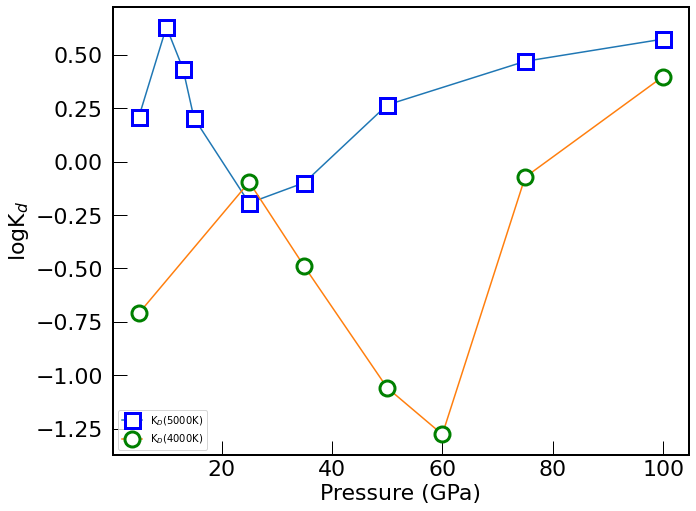

In [814]:
plt.plot(P_5000K[:], logK_5000K[:]/np.log(10), mfc='w', marker='s',ms=15, mec='b', mew=3, label=r"K$_D$(5000K)")
plt.plot(P_4000K[:], logK_4000K[:]/np.log(10), mfc='w', marker='o',ms=15, mec='g', mew=3, label=r"K$_D$(4000K)")
plt.xlabel('Pressure (GPa)')
plt.ylabel(r'logK$_d$')
plt.legend()

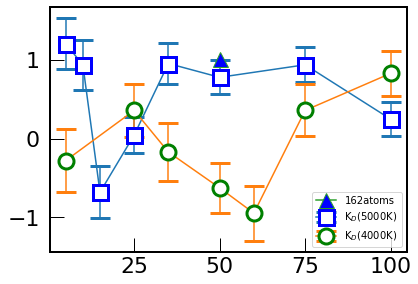

In [39]:
plt.errorbar(P_5000K[:], (logK_5000K[:] + 1)/np.log(10),yerr=logK_5000K_err[:]/np.log(10), mfc='w', marker='s',ms=15,\
             mec='b', mew=3, capsize=10,label=r"K$_D$(5000K)")

plt.errorbar(P_4000K[:], (logK_4000K[:] + 1) /np.log(10),yerr=logK_4000K_err[:]/np.log(10), mfc='w', marker='o',ms=15,\
             mec='g', mew=3, capsize=10,label=r"K$_D$(4000K)")
             

plt.plot([50], [(1.336107727165879 + 1)/np.log(10)], ms=15,marker = '^',mfc='b', label='162atoms')
plt.legend()


$$PbO(silicate) + Fe(Fe) == FeO(silicate) + Pb(Fe)$$

$$K_D = \frac{a_{FeO}a_{Pb}}{a_{Fe}a_{PbO}} = e^{(\Delta{G}-\Delta{G}^o)/k_BT}$$

$$ \Delta{IW} = 2\log(\frac{a_{FeO}}{a_{Fe}}) $$

$$\log{K_D} = \log(\frac{a_{FeO}}{a_{Fe}}) - \log(\frac{a_{PbO}}{a_{Pb}}) =  \frac{(\Delta{G}-\Delta{G}^o)}{k_BT} $$

$$\log(\frac{a_{PbO}}{a_{Pb}}) = \log(\frac{a_{FeO}}{a_{Fe}}) - \log{K_D}$$

$$\log{D_{Pb}} =  \log(\frac{X_{Pb}}{X_{PbO}}) \approx \log{K_D} - \log(\frac{a_{FeO}}{a_{Fe}}) =  \frac{(\Delta{G}-\Delta{G}^o)}{k_BT}- \frac{1}{2}\Delta{IW}$$

In [40]:
#plt.plot(P, G_MgSiO3PbO_5000K - G_MgSiO3_5000K,'-o',ms=13, mfc='w')
#plt.plot(P, G_MgSiO3FeO_4000K,'-o',ms=13, mfc='w')
#plt.plot(P, G_MgSiO3PbO_4000K,'-o',ms=13, mfc='w')
#plt.plot(P, G_FePb_5000K - G_Fe_5000K,'-d',ms=13, mfc='w')
#plt.plot(P, G_FePb_4000K, '-s',ms=13, mfc='w')
#plt.plot(P, G_Fe_4000K, '-s',ms=13, mfc='w')

#plt.plot(P, G_MgSiO3PbO_4000K - G_MgSiO3FeO_4000K,'-o',ms=13, mfc='w', label='oxide')
#plt.plot(P, G_MgSiO3FeO_4000K,'-o',ms=13, mfc='w')
#plt.plot(P, G_FePb_4000K - G_Fe_4000K,'-d',ms=13, mfc='w', label='Fe+Pb')
#plt.plot(P, G_FePb_4000K, '-s',ms=13, mfc='w')

#plt.legend()

In [41]:
with open("POSCAR_322",'r') as f:
    lines = f.readlines()
#for line in lines:
#    print(line)

title = lines[0]
lattice_constant = float(lines[1].strip())
ax = np.array(list(map(np.float32, lines[2].strip().split()))) * lattice_constant
ay = np.array(list(map(np.float32, lines[3].strip().split()))) * lattice_constant
az = np.array(list(map(np.float32, lines[4].strip().split()))) * lattice_constant
atom_type = lines[5].strip().split()
ntype = len(atom_type)
atom_number = list(map(int,lines[6].strip().split()))
N = np.sum(atom_number)
#print(N)
coordinate_type = lines[7].strip()
assert coordinate_type[0] == 'D' or coordinate_type[0] == 'd', "should be direct"
coordinates = []
for line in lines[8:8+N]:
    x, y, z = list(map(float, line.strip().split()))
    coordinates.append([x, y, z])
coordinates = np.array([coordinates]).squeeze()

dic_positions = {}
for iname in range(ntype):
    name = atom_type[iname]
    dic_positions[name] = []

#print(dic_positions)
accumulates = atom_number.copy()
for i in range(1,ntype):
    accumulates[i] += accumulates[i-1] 

    
remainings = atom_number.copy()
iname = 0

for i in range(N):
    if remainings[iname] > 0:
        remainings[iname] -= 1
    else:
        iname += 1
        assert remainings[iname] > 0, "zero atoms is not allowed"
        remainings[iname] -= 1
    name = atom_type[iname]
    dic_positions[name].append(coordinates[i])
    


def distance_PBC(x1, y1, z1, x2, y2, z2, Lx=ax[0], Ly=ay[1], Lz=az[2]):
    diffx = abs(x1-x2) if abs(x1-x2) < .5 else 1-abs(x1-x2)
    diffy = abs(y1-y2) if abs(y1-y2) < .5 else 1-abs(y1-y2)
    diffz = abs(z1-z2) if abs(z1-z2) < .5 else 1-abs(z1-z2)
    diffx *= Lx
    diffy *= Ly
    diffz *= Lz
    return np.sqrt(diffx**2+diffy**2+diffz**2)


In [42]:
len(dic_positions['Pb'])

2

In [43]:
x1, y1, z1 = dic_positions['Pb'][1]
distmax = 0.0
imx = 0
for i in range(len(dic_positions['O'])):
    x2, y2, z2 = dic_positions['O'][i]
    disti = distance_PBC(x1, y1, z1, x2, y2, z2, Lx=ax[0], Ly=ay[1], Lz=az[2])
    if disti > distmax:
        imx = i
#x1, y1, z1

In [44]:
print(imx)
x2, y2, z2 = dic_positions['O'][imx]
print(x2, y2, z2)

193
0.87491405437699 0.488076187177344 0.465494709687299


In [45]:
np.log(10)

2.302585092994046

-9.841566470657881

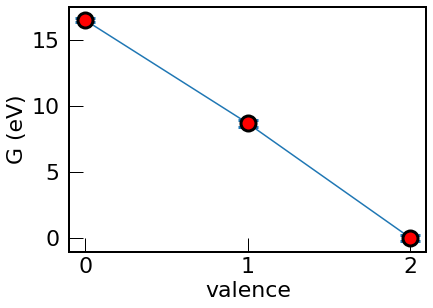

In [46]:
m = np.array([0, 1, 2])
G_MgSiO3_PbOn = np.array([-21.3734630000, -21.6600930000, -21.9787730000]) * Ha_to_eV
G_MgSiO3_PbOn_err = np.array([0.0060102256, 0.0098074504, 0.0078449368]) * Ha_to_eV

plt.xlabel("valence")
plt.xticks([0,1,2])
plt.ylabel("G (eV)")
plt.errorbar(m, G_MgSiO3_PbOn - G_MgSiO3_PbOn[-1], G_MgSiO3_PbOn_err, marker = 'o', mfc='r', ms = 15, mec = 'k', mew = 3, capsize=10)


G_Fe81O_5000K = -28.4531270000 * Ha_to_eV
G_Fe81_5000K = -27.7446480000 * 81/80 * Ha_to_eV
mu_O_5000K = G_Fe81O_5000K - G_Fe81_5000K
mu_O_5000K

<ErrorbarContainer object of 3 artists>

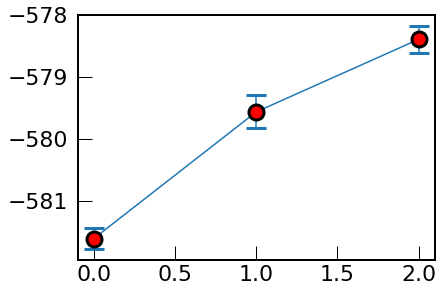

In [47]:
mu_O_valence = m * mu_O_5000K
plt.errorbar(m, G_MgSiO3_PbOn - mu_O_valence, G_MgSiO3_PbOn_err, marker = 'o', mfc='r', ms = 15, mec = 'k', mew = 3, capsize=10)



# 5000K 50GPa Size

Text(0, 0.5, 'logK')

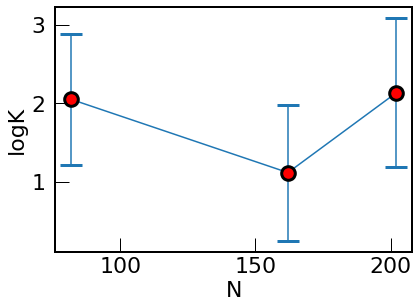

In [48]:
N = np.array([82,162,202])
G_MgSiO3FeO_5000K_size = np.array([-21.9714840000, -43.2723200000, -53.9727830000]) * Ha_to_eV
G_MgSiO3FeO_5000K_size_err = np.array([0.0075877529, 0.0071666259, 0.0116528130]) * Ha_to_eV

G_MgSiO3PbO_5000K_size = np.array([-21.6600930000, -43.0013720000, -53.6715790000]) * Ha_to_eV
G_MgSiO3PbO_5000K_size_err = np.array([0.0098074504, 0.0108897340, 0.0081061324]) * Ha_to_eV

G_Fe_5000K_size = np.array([-27.7446480000*81/80,  -55.8271590000, -69.7227890000]) * Ha_to_eV
G_Fe_5000K_size_err = np.array([0.0016078071*81/80, 0.00285212330, 0.0035634903]) * Ha_to_eV

G_FePb_5000K_size = np.array([-27.8389860000, -55.5813010000, -69.4835860000]) * Ha_to_eV
G_FePb_5000K_size_err = np.array([0.0040361688, 0.0029831498, 0.0032913457]) * Ha_to_eV

logK_5000K_size =  ((G_MgSiO3PbO_5000K_size + G_Fe_5000K_size) - (G_MgSiO3FeO_5000K_size + G_FePb_5000K_size)) / (kBT_5000K)
logK_err = np.sqrt(np.square(G_MgSiO3FeO_5000K_size_err) + np.square(G_MgSiO3PbO_5000K_size_err) + np.square(G_Fe_5000K_size_err) + np.square(G_FePb_5000K_size_err))/ (kBT_5000K)


#plt.plot(N, logK_5000K_82atoms,'-o',ms=20,mfc='w',mec='y',mew=6)
plt.errorbar(N, (logK_5000K_size+1)/np.log(10), logK_err, capsize=11, marker = 'o', ms = 13.6, mfc='r', mec='k', mew=3)
plt.xlabel("N")
plt.ylabel("logK")


# Ideal mixing formula

In [49]:
V_FeO = 15.879089999999906
V_PbO = 27.248999999999910
V_MgSiO3 =  8.788963750000001
V_Pb = 23.606769999999983
V_Fe = 10.536304250000001
kBT = 0.430866516860861
def deltaG(N=10**6, n=80):
    ratio1 = (N+1)*np.log((N*V_Fe+V_Pb)/((N+1)*V_Fe))
    ratio2 = (n+1)*np.log((n*V_Fe+V_Pb)/((n+1)*V_Fe))
    ratio3 = (N+2)*np.log((N*V_MgSiO3+V_FeO)/(N*V_MgSiO3+V_PbO))
    ratio4 = (n+2)*np.log((n*V_MgSiO3+V_FeO)/(n*V_MgSiO3+V_PbO))
    return -  (ratio1 - ratio2 + ratio3 - ratio4)

In [50]:
deltaG(N=10**6, n=80)

-0.0023138187511340114

Text(0, 0.5, '$\\frac{\\Delta G(N) - \\Delta G(n)}{k_BT}$')

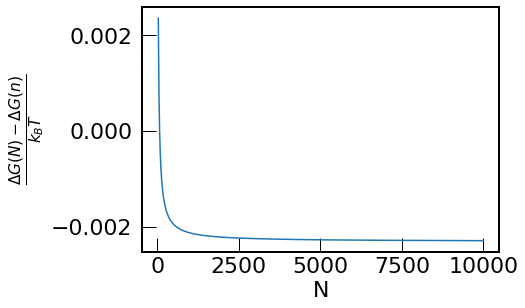

In [51]:
Ns = np.power(10, np.arange(2,3, 0.01))
Ns = np.arange(40, 10000, 10)
dGs = np.array([deltaG(N_,80) for N_ in Ns])
plt.plot(Ns, dGs, '-')
plt.xlabel("N")
plt.ylabel(r"$\frac{\Delta G(N) - \Delta G(n)}{k_BT}$")


In [52]:
np.log(0.05/0.5)

-2.3025850929940455

In [53]:
kboltzmann = 0.000086173303372 # eV/K
Ha_to_eV = 27.211386016010209

G_MgSiO3_16 = -21.2806690000 * Ha_to_eV
Gerr_MgSiO3_16 = 0.0062500385 * Ha_to_eV


G_MgSiO3_16_Pb = -21.3734630000 * Ha_to_eV
Gerr_MgSiO3_16_Pb = 0.0060102256 * Ha_to_eV

G_MgSiO3_16_PbO = -21.6781040000 * Ha_to_eV
Gerr_MgSiO3_16_PbO = 0.0098074504 * Ha_to_eV

G_MgSiO3_16_PbO2 = -21.9782420000 * Ha_to_eV
Gerr_MgSiO3_16_PbO2 = 0.0078623779 * Ha_to_eV

G_MgSiO3_16_O = -21.5715110000 * Ha_to_eV
Gerr_MgSiO3_16_O = 0.0088145514 * Ha_to_eV

mu_Pb_sil = G_MgSiO3_16_Pb - G_MgSiO3_16
muerr_Pb_sil = np.sqrt(Gerr_MgSiO3_16_Pb**2 + Gerr_MgSiO3_16**2)

mu_PbO_sil = G_MgSiO3_16_PbO - G_MgSiO3_16
muerr_PbO_sil = np.sqrt(Gerr_MgSiO3_16_PbO**2 + Gerr_MgSiO3_16**2)

mu_PbO2_sil = G_MgSiO3_16_PbO2 - G_MgSiO3_16
muerr_PbO2_sil = np.sqrt(Gerr_MgSiO3_16_PbO2**2 + Gerr_MgSiO3_16**2)

mu_O_sil = G_MgSiO3_16_O - G_MgSiO3_16
muerr_O_sil = np.sqrt(Gerr_MgSiO3_16_O**2 + Gerr_MgSiO3_16**2)




In [54]:
mu_O_sil

-7.914213931668542

In [55]:
print(mu_Pb_sil)

print(mu_PbO_sil)

print(mu_PbO2_sil)

-2.5250533539697244
-10.814757201273096
-18.98192817734639


In [56]:
print(mu_Pb_sil + mu_O_sil)

print(mu_Pb_sil + 2*mu_O_sil)

-10.439267285638266
-18.353481217306808


In [57]:
print(muerr_PbO_sil)
print(mu_Pb_sil + mu_O_sil - mu_PbO_sil)

0.31645925276329767
0.37548991563483014


In [58]:
print(muerr_PbO2_sil)
print(mu_Pb_sil + 2*mu_O_sil - mu_PbO2_sil)

0.2733084945756645
0.6284469600395823


In [59]:
kboltzmann * 5000 * np.log(0.6/(50/82))

-0.00694961061123359

In [60]:
kboltzmann = 0.000086173303372 # eV/K
Ha_to_eV = 27.211386016010209

G_Fe_80 = -27.7458070000 * Ha_to_eV
Gerr_Fe_80 = 0.0014390137 * Ha_to_eV

G_Fe_80_Pb = -27.8331690000 * Ha_to_eV
Gerr_Fe_80_Pb = 0.0018971594 * Ha_to_eV

G_Fe_80_PbO = -28.1712910000 * Ha_to_eV
Gerr_Fe_80_PbO = 0.0025677782 * Ha_to_eV

G_Fe_80_PbO2 = -28.5587460000 * Ha_to_eV
Gerr_Fe_80_PbO2 = 0.0030894828 * Ha_to_eV

G_Fe_81_O = -28.4504350000 * Ha_to_eV
Gerr_Fe_81_O = 0.0018132914 * Ha_to_eV

mu_Pb_met = G_Fe_80_Pb - G_Fe_80
muerr_Pb_met = np.sqrt(Gerr_Fe_80_Pb**2 + Gerr_Fe_80**2)

mu_PbO_met = G_Fe_80_PbO - G_Fe_80
muerr_PbO_met = np.sqrt(Gerr_Fe_80_PbO**2 + Gerr_Fe_80**2)

mu_PbO2_met = G_Fe_80_PbO2 - G_Fe_80
muerr_PbO2_met = np.sqrt(Gerr_MgSiO3_16_PbO2**2 + Gerr_MgSiO3_16**2)

mu_O_met = G_Fe_81_O- G_Fe_80 * 81 / 80
muerr_O_met = np.sqrt((Gerr_Fe_81_O * 81 / 80)**2 + (Gerr_Fe_80)**2)



In [61]:
print(mu_Pb_met)

print(mu_PbO_met)
print(mu_Pb_met + mu_O_met)

print(mu_PbO2_met)
print(mu_Pb_met + 2*mu_O_met)

-2.3772411051307927
-11.578009367636128
-12.113622303286093
-22.121196936469346
-21.850003501441392


In [62]:
print(muerr_PbO_met)
print(mu_Pb_met + mu_O_met - mu_PbO_met)

0.08009696001085292
-0.535612935649965


In [63]:
print(muerr_PbO2_met)
print(mu_Pb_met + 2*mu_O_met - mu_PbO2_met)

0.2733084945756645
0.27119343502795346


In [64]:
mu_O_sil

-7.914213931668542

In [65]:
mu_O_met

-9.7363811981553

In [66]:
mu_O_tilde_sil = mu_O_sil - kboltzmann * 5000 * np.log(0.6)

mu_O_tilde_met = mu_O_met - kboltzmann * 5000 * np.log(1/81)


In [67]:
np.exp( (mu_O_tilde_met - mu_O_tilde_sil)/(kboltzmann * 5000) ) * 0.6

0.42473996634477457

In [68]:
print(mu_O_tilde_sil, mu_O_tilde_met)

-7.694116274433652 -7.842960197363214


In [69]:
G_Fe80O4 = -29.1289420000 * Ha_to_eV
G_Fe_80

-755.0018646027181

In [70]:
G_Fe80O4

-792.6388849999724

In [71]:
(G_Fe80O4 - G_Fe_80) / 4

-9.409255099313583

In [72]:
mu_O_tilde_met

-7.842960197363214

In [73]:
mu_O_tilde_sil

-7.694116274433652

In [74]:
(G_Fe80O4 - G_Fe_80) / 4 - kboltzmann * 5000 * np.log(2/82)

-7.809201237824106

In [75]:
np.exp( (-7.809201237824106 - mu_O_tilde_sil)/(kboltzmann * 5000) ) * 0.6

0.4593573538854103

In [76]:
G_Fe64O16 = -27.4510000000 * Ha_to_eV
G_Fe_80

-755.0018646027181

In [77]:
(G_Fe64O16 - G_Fe_80 * 64 / 80) / 16 - kboltzmann * 5000 * np.log(8/72)

-7.989431114811568

In [78]:
print(G_Fe81O_5000K - G_Fe_80 * 81/80 )
print((G_Fe80O4 - G_Fe_80) / 4)
print((G_Fe64O16 - G_Fe_80 * 64 / 80) / 16 )

-9.80963424931042
-9.409255099313583
-8.93614161520761


In [79]:
print(G_MgSiO3_16_O - G_MgSiO3_16)

-7.914213931668542


# Fitting IW buffer

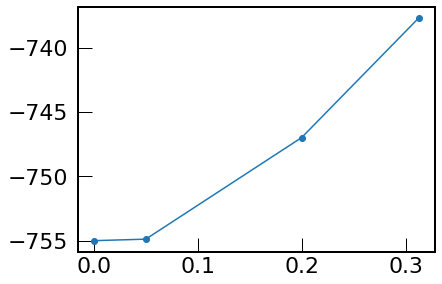

In [80]:
N = 80
n_O = np.array([0,4,16,25])
c_O = n_O / N
G_FeO = np.array([-27.7458070000, -27.7414470000, -27.4509080000, -27.1094120000]) * Ha_to_eV

plt.plot(c_O, G_FeO,'-o')

def G_total(c, mu0_O, a, b):
    T = 5000
    mu0_Fe = -27.7458070000*Ha_to_eV/80
    return N* ( kboltzmann*T*(c*np.log(c) + (1-c)*np.log(1-c)) + (1-c)*mu0_Fe + c*mu0_O \
               + a*(c+(1-c)*np.log(1-c)) \
               + b*(c*(1-c) + (1-c)*np.log(1-c) + 0.5*c*c) )


In [81]:
xdata = c_O[1:]
ydata = G_FeO[1:]
popt, pcov = curve_fit(G_total, xdata, ydata)



/Users/wjz8597/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [82]:
def mu_O(c,mu0_O, a,b):
    T = 5000
    return mu0_O + a*c + 0.5*b*c*c + kboltzmann*5000*np.log(c)



In [83]:
def mu_Fe(c, mu0_Fe, a, b):
    T = 5000
    mu0_Fe = -27.7458070000*Ha_to_eV/80
    return mu0_Fe + (a+b)*c + 0.5*b*c*c + (a+b+kboltzmann*T)*np.log(1-c)

In [84]:
mu0_Fe = -27.7458070000*Ha_to_eV/80
mu0_Fe

-9.437523307533976

In [85]:
popt

array([-7.61819216, -3.38798819, 16.72515626])

In [86]:
mu_O(25/80,*popt)

-8.361443183050891

In [87]:
G_Fe64O16 * Ha_to_eV

-20326.354528171985

In [88]:
mu_O(0.4,*popt)

-8.030173927076222

In [89]:
mu_O(0.5,*popt)

-7.520195629208438

In [90]:
mu_Fe(0.3,*popt)

-9.594453819473205

Text(0, 0.5, '$G_{total}$ (eV/cell)')

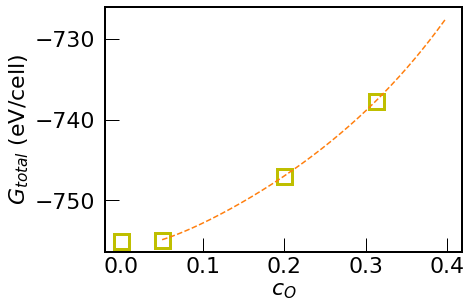

In [91]:
plt.plot(c_O, G_FeO,'s',ms=15,mfc='w', mew=3, mec='y')
cs = np.arange(0.05,0.4,0.001)
gs = [G_total(c, *popt) for c in cs]

plt.plot(cs,gs,'--')
plt.xlabel(r"$c_O$")
plt.ylabel(r"$G_{total}$ (eV/cell)")

# EOS

In [38]:
def P_V_BM(V, V0, K0, K0p):
    f = V0/V
    P = 1.5*K0 * (f**(7.0/3.0) - f**(5.0/3.0)) * (1 + 0.75*(K0p-4)*(f**(2.0/3.0)-1))
    return P

def E_V_BM(V, V0, K0, K0p, E0):
    f = V0/V
    E = E0 + (9*V0*K0/16)*0.006241509125883 * ( (f**(2.0/3.0)-1)**3 * K0p + (f**(2.0/3.0)-1)**2 * (6-4*(f**(2.0/3.0))))
    return E
    

In [39]:
E_V_BM(600,1200,40,4.00,20)

136.29279527731816

In [40]:
data = np.loadtxt("EOS_MgSiO3FeO_5000K.dat", usecols=(3,5,7,9,11,12,14,15), dtype=float) 

In [41]:
N = data[0,0]
V = data[:,1]
rho = data[:,2]
T = data[0][3]
P = data[:,4]
dP = data[:,5]
E = data[:,6] * Ha_to_eV
dE = data[:,7] * Ha_to_eV

In [42]:
Ha_to_eV

27.21138601601021

In [43]:
from scipy import fft
from scipy.optimize import curve_fit

In [44]:
filename = "EOS_MgSiO3FeO_5000K.dat"
data = np.loadtxt(filename, usecols=(3,5,7,9,11,12,14,15), dtype=float) 
N = data[0,0]
V = data[:,1]
rho = data[:,2]
T = data[0][3]
P = data[:,4]
dP = data[:,5]
E = data[:,6] * Ha_to_eV
dE = data[:,7] * Ha_to_eV
#print(V)
#print(P)
#print(E)
popt_Press, pcov_Press = curve_fit(P_V_BM, V, P, p0=(1200, 40, 4.00))
popt_Energy, pcov_Energy = curve_fit(E_V_BM, V, E,p0=(1200, 40, 4.00, -450))
fPV = lambda v:P_V_BM(v, *popt_Press)
fEV = lambda v:E_V_BM(v, *popt_Energy)
print(popt_Press)
print(popt_Energy)

[1509.7088165     9.82040561    5.14979694]
[ 897.20104804   52.43696219    4.51194794 -441.98702102]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


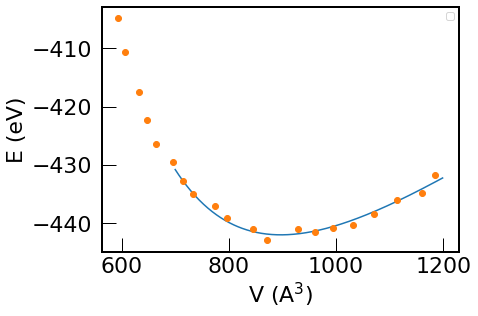

In [45]:
Vs = np.arange(700,1200,1)
Ps = [fPV(V_) for V_ in Vs]
Es = [fEV(V_) for V_ in Vs]
plt.plot(Vs, Es)
plt.plot(V, E, 'o')
plt.xlabel(r"V (A$^3$)")
plt.ylabel("E (eV)")
plt.legend()


(0.0, 20.0)

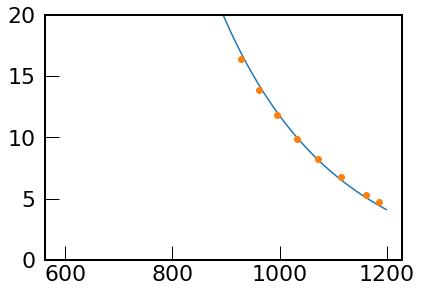

In [46]:
plt.plot(Vs, Ps)
plt.plot(V, P, 'o')
plt.ylim(0,20)

In [47]:
def read_EOS(filename, pP0=(1200, 40, 4.00), pE0=(1200, 40, 4.00, -450)):
    data = np.loadtxt(filename, usecols=(3,5,7,9,11,12,14,15), dtype=float) 
    N = data[0,0]
    V = data[:,1]
    rho = data[:,2]
    T = data[0][3]
    P = data[:,4]
    dP = data[:,5]
    E = data[:,6] * Ha_to_eV
    dE = data[:,7] * Ha_to_eV
    popt_Press, pcov_Press = curve_fit(P_V_BM, V, P, p0=pP0)
    popt_Energy, pcov_Energy = curve_fit(E_V_BM, V, E,p0=pE0)
    fPV = lambda v:P_V_BM(v, *popt_Press)
    fEV = lambda v:E_V_BM(v, *popt_Energy)
    return V, P, E, fPV, fEV

def inverse(fPV):
    def fVP(P_):
        def diff(V):
            return P_ - fPV(V)
        V_tgt = fsolve(diff, x0=500)
        return V_tgt
    return fVP
    

In [48]:
V_MgSiO3FeO_5000K

NameError: name 'V_MgSiO3FeO_5000K' is not defined

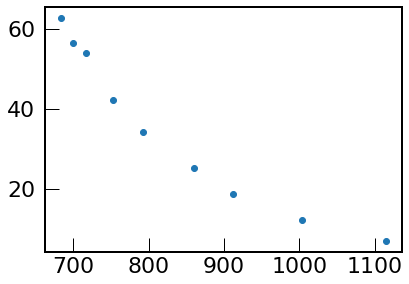

In [49]:
filename = "EOS_MgSiO3Pb_5000K.dat"
pP0=(1200, 40, 4.00)
pE0=(1200, 40, 4.00, -450)
data = np.loadtxt(filename, usecols=(3,5,7,9,11,12,14,15), dtype=float) 
N = data[0,0]
V = data[:,1]
rho = data[:,2]
T = data[0][3]
P = data[:,4]
dP = data[:,5]
E = data[:,6] * Ha_to_eV
dE = data[:,7] * Ha_to_eV

plt.plot(V, P, 'o')

In [50]:
V_MgSiO3FeO_5000K, P_MgSiO3FeO_5000K, E_MgSiO3FeO_5000K, fPV_MgSiO3FeO_5000K, fEV_MgSiO3FeO_5000K \
= read_EOS("EOS_MgSiO3FeO_5000K.dat") 

V_MgSiO3PbO_5000K, P_MgSiO3PbO_5000K, E_MgSiO3PbO_5000K, fPV_MgSiO3PbO_5000K, fEV_MgSiO3PbO_5000K \
= read_EOS("EOS_MgSiO3PbO_5000K.dat") 

V_MgSiO3Pb_5000K, P_MgSiO3Pb_5000K, E_MgSiO3Pb_5000K, fPV_MgSiO3Pb_5000K, fEV_MgSiO3Pb_5000K \
= read_EOS("EOS_MgSiO3Pb_5000K.dat") 

V_MgSiO3_5000K, P_MgSiO3_5000K, E_MgSiO3_5000K, fPV_MgSiO3_5000K, fEV_MgSiO3_5000K \
= read_EOS("EOS_MgSiO3_5000K.dat") 


fVP_MgSiO3FeO_5000K = inverse(fPV_MgSiO3FeO_5000K)
fVP_MgSiO3PbO_5000K = inverse(fPV_MgSiO3PbO_5000K)
fVP_MgSiO3Pb_5000K = inverse(fPV_MgSiO3Pb_5000K)
fVP_MgSiO3_5000K = inverse(fPV_MgSiO3_5000K)

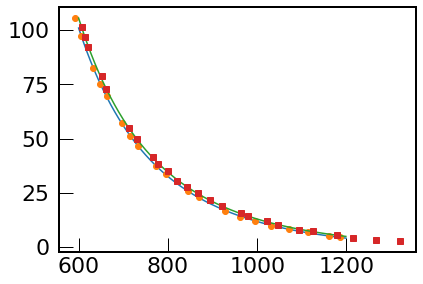

In [51]:
Vs = np.arange(600,1200,1)

Ps_MgSiO3 = [fPV_MgSiO3_5000K(v) for v in Vs]
Ps_MgSiO3FeO = [fPV_MgSiO3FeO_5000K(v) for v in Vs]
Ps_MgSiO3PbO = [fPV_MgSiO3PbO_5000K(v) for v in Vs]
Ps_MgSiO3Pb = [fPV_MgSiO3Pb_5000K(v) for v in Vs]

#plt.plot(Vs, Ps_MgSiO3)
plt.plot(Vs, Ps_MgSiO3FeO)
plt.plot(V_MgSiO3FeO_5000K, P_MgSiO3FeO_5000K,'o')

plt.plot(Vs, Ps_MgSiO3PbO)
plt.plot(V_MgSiO3PbO_5000K, P_MgSiO3PbO_5000K,'s')
#print(min(Ps_MgSiO3))



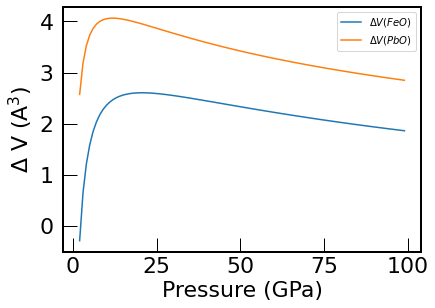

In [52]:
Ps = np.arange(2,100,1)
Vs_MgSiO3 = np.array([fVP_MgSiO3_5000K(p) for p in Ps])
Vs_MgSiO3FeO = np.array([fVP_MgSiO3FeO_5000K(p) for p in Ps])
Vs_MgSiO3PbO = np.array([fVP_MgSiO3PbO_5000K(p) for p in Ps])

#plt.plot(Ps, Vs_MgSiO3)
plt.plot(Ps, (Vs_MgSiO3FeO - Vs_MgSiO3)/Vs_MgSiO3*80, label=r'$\Delta V(FeO)$')
plt.plot(Ps, (Vs_MgSiO3PbO - Vs_MgSiO3)/Vs_MgSiO3*80, label=r'$\Delta V(PbO)$')
plt.xlabel("Pressure (GPa)")
plt.ylabel(r"$\Delta$ V (A$^3$)")
plt.legend()

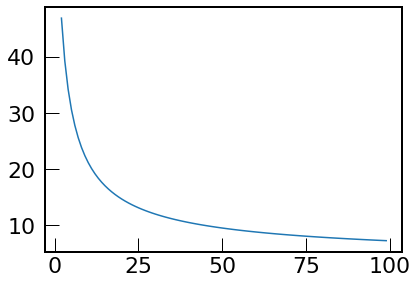

In [53]:
plt.plot(Ps, (Vs_MgSiO3PbO - Vs_MgSiO3FeO))

(0.0, 4000.0)

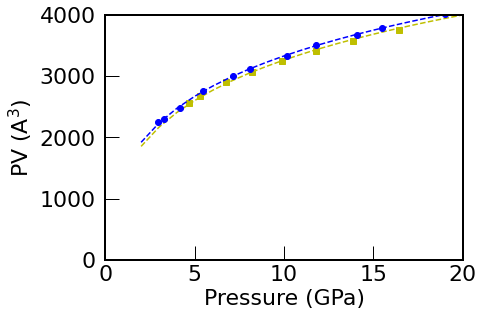

In [54]:
plt.plot(Ps, Ps.squeeze()**.5*Vs_MgSiO3FeO.squeeze(), '--',color='y')
plt.plot(P_MgSiO3FeO_5000K, P_MgSiO3FeO_5000K.squeeze()**.5*V_MgSiO3FeO_5000K.squeeze(), 'ys')

plt.plot(Ps, Ps.squeeze()**.5*Vs_MgSiO3PbO.squeeze(), '--', color='b')
plt.plot(P_MgSiO3PbO_5000K, P_MgSiO3PbO_5000K.squeeze()**.5*V_MgSiO3PbO_5000K.squeeze(), 'bo')

plt.xlabel("Pressure (GPa)")
plt.ylabel(r"PV (A$^3$)")
plt.xlim(0,20)
plt.ylim(0,4000)

[1164.69095063   67.50292666    5.27765776]
[ 870.53676885  196.09636978    5.37052277 -509.48135089]


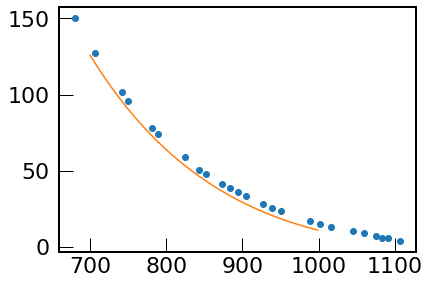

In [55]:
filename = "EOS_Fe_5000K.dat"
data = np.loadtxt(filename, usecols=(3,5,7,9,11,12,14,15), dtype=float) 
N = data[0,0]
V = data[:,1]
rho = data[:,2]
T = data[0][3]
P = data[:,4]
dP = data[:,5]
E = data[:,6] * Ha_to_eV
dE = data[:,7] * Ha_to_eV
#print(V)
#print(P)
#print(E)
popt_Press, pcov_Press = curve_fit(P_V_BM, V, P, p0=(1200,75,4.3))
popt_Energy, pcov_Energy = curve_fit(E_V_BM, V, E,p0=(1200,75,4.3, 0.0))
fPV = lambda v:P_V_BM(v, *popt_Press)
fEV = lambda v:E_V_BM(v, *popt_Energy)
print(popt_Press)
print(popt_Energy)
plt.plot(V, P, 'o')
Vs = np.arange(700,1000,1)
Ps = [P_V_BM(v, 1200,75,4.3) for v in Vs]
Es = [E_V_BM(v, 1200,75,4.3, 0.0) for v in Vs]
plt.plot(Vs, Es)

In [56]:
V_Fe_5000K, P_Fe_5000K, E_Fe_5000K, fPV_Fe_5000K, fEV_Fe_5000K \
= read_EOS("EOS_Fe_5000K.dat", pP0=(1200,75,4.3), pE0=(1200,75,4.3, 0.0)) 

V_FePb_5000K, P_FePb_5000K, E_FePb_5000K, fPV_FePb_5000K, fEV_FePb_5000K \
= read_EOS("EOS_FePb_5000K.dat", pP0=(1200,75,4.3), pE0=(1200,75,4.3, 0.0)) 

fVP_Fe_5000K = inverse(fPV_Fe_5000K)
fVP_FePb_5000K = inverse(fPV_FePb_5000K)


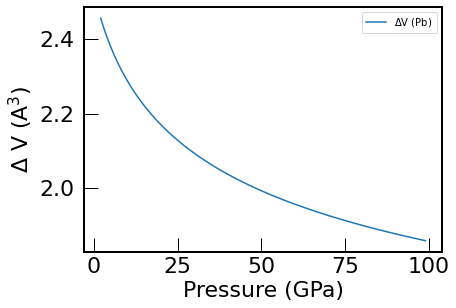

In [57]:
Ps = np.arange(2,100,1)
Vs_Fe = np.array([fVP_Fe_5000K(p) for p in Ps])
Vs_FePb = np.array([fVP_FePb_5000K(p) for p in Ps])
Vs_MgSiO3FeO = np.array([fVP_MgSiO3FeO_5000K(p) for p in Ps])
Vs_MgSiO3PbO = np.array([fVP_MgSiO3PbO_5000K(p) for p in Ps])
Vs_MgSiO3Pb = np.array([fVP_MgSiO3Pb_5000K(p) for p in Ps])
#plt.plot(Ps, Vs_Fe/80, label="V (Fe)")
plt.plot(Ps, (Vs_FePb - Vs_Fe)/Vs_Fe*80, label=r"$\Delta$V (Pb)")
plt.xlabel("Pressure (GPa)")
plt.ylabel(r"$\Delta$ V (A$^3$)")
plt.legend()

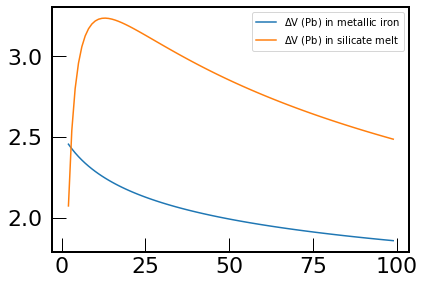

In [58]:
plt.plot(Ps, (Vs_FePb - Vs_Fe)/Vs_Fe*80, label=r"$\Delta$V (Pb) in metallic iron")
plt.plot(Ps, (Vs_MgSiO3Pb - Vs_MgSiO3)/Vs_MgSiO3*80, label=r"$\Delta$V (Pb) in silicate melt")
plt.legend()

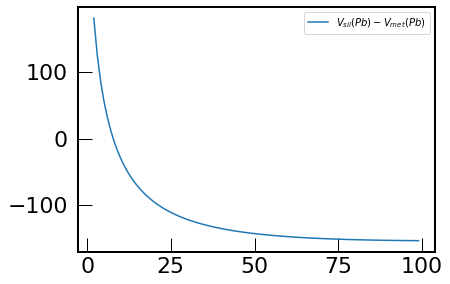

In [59]:
plt.plot(Ps, (Vs_MgSiO3Pb - Vs_FePb), label=r"$V_{sil}(Pb) - V_{met}(Pb)$")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


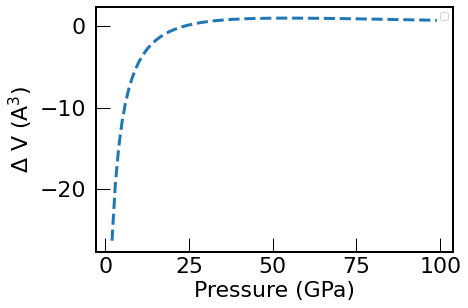

In [60]:
#plt.plot(Ps, Vs_MgSiO3PbO - Vs_MgSiO3FeO, label=r'$\Delta V(silicate)$')
#plt.plot(Ps, Vs_FePb - Vs_Fe*81/80, label=r"$\Delta$V (metallic)")
plt.plot(Ps, Vs_MgSiO3FeO + Vs_FePb - Vs_MgSiO3PbO - Vs_Fe*81/80,'--',lw=3)
plt.xlabel("Pressure (GPa)")
plt.ylabel(r"$\Delta$ V (A$^3$)")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


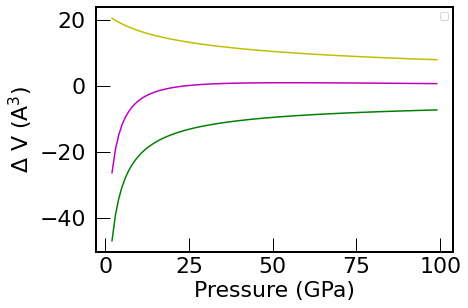

In [61]:
#plt.plot(Ps, Vs_MgSiO3FeO + Vs_FePb - Vs_MgSiO3PbO - Vs_Fe*81/80,'--',lw=3, label=r'$\frac{\partial{G}}{\partial{P}}$')
Vs_MgSiO3FeO = np.array([fVP_MgSiO3FeO_5000K(p) for p in Ps])
Vs_MgSiO3PbO = np.array([fVP_MgSiO3PbO_5000K(p) for p in Ps])

#plt.plot(Ps, Vs_MgSiO3FeO, color='b' )
#plt.plot(P_MgSiO3FeO_5000K, V_MgSiO3FeO_5000K, 'bs')

#plt.plot(Ps, Vs_MgSiO3PbO, color='y' )
#plt.plot(P_MgSiO3PbO_5000K, V_MgSiO3PbO_5000K, 'yo')

Vs_Fe = np.array([fVP_Fe_5000K(p) for p in Ps])
Vs_FePb = np.array([fVP_FePb_5000K(p) for p in Ps])

# plt.plot(Ps, Vs_Fe*81/80)
# plt.plot(P_Fe_5000K, V_Fe_5000K * 81/80, 'g^')

# plt.plot(Ps, Vs_FePb)
# plt.plot(P_FePb_5000K, V_FePb_5000K, 'rv')

plt.plot(Ps, Vs_FePb - Vs_Fe*81/80,color='y')
plt.plot(Ps, Vs_MgSiO3FeO - Vs_MgSiO3PbO,color='g')
plt.plot(Ps, Vs_MgSiO3FeO + Vs_FePb - Vs_MgSiO3PbO - Vs_Fe * 81/80,color='m')

plt.xlabel("Pressure (GPa)")
plt.ylabel(r"$\Delta$ V (A$^3$)")
plt.legend()

In [62]:
dV_5000K = np.loadtxt("dV_5000K.dat")

Text(0, 0.5, 'dV (A$^3$)')

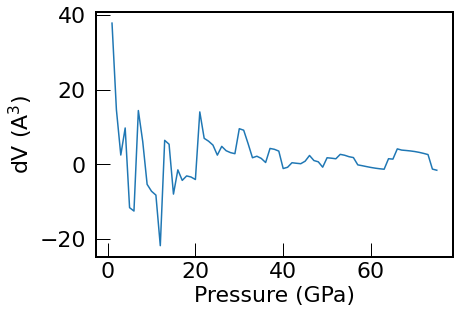

In [63]:
plt.plot(dV_5000K[:,0], dV_5000K[:,1])
plt.xlabel("Pressure (GPa)")
plt.ylabel(r"dV (A$^3$)")

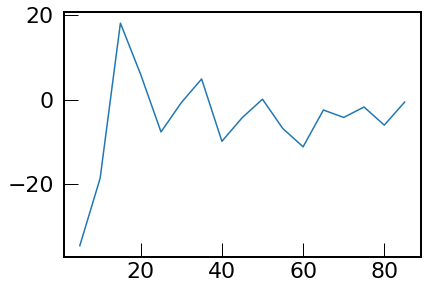

In [64]:
dV_4000K = np.loadtxt("dV_4000K.dat")
plt.plot(dV_4000K[:,0], dV_4000K[:,1])

In [65]:
fig_size = [700/72.27 ,520/72.27]
params = {'backend': 'ps', 'axes.labelsize': 22, 'legend.fontsize': 10,
          'xtick.labelsize': 22, 'ytick.labelsize': 22, 
          'xtick.major.size': 14,'ytick.major.size': 14,
          'xtick.minor.size': 7,'ytick.minor.size': 7,
          'xtick.direction': 'in', 'ytick.direction': 'in',
          'xtick.major.width': 1.0, 'ytick.major.width': 1.0,
          'xtick.minor.width': 1.0, 'ytick.minor.width': 1.0,
          'text.usetex': False, 'figure.figsize': fig_size, 'axes.linewidth': 2,
          'xtick.major.pad': 5,
          'ytick.major.pad': 10,
          'figure.subplot.bottom': 0.110,'figure.subplot.top': 0.975,'figure.subplot.left': 0.150,'figure.subplot.right': 0.977}

import matplotlib

matplotlib.rcParams.update(params)

In [66]:
Pressures_5000K = np.array([5, 10, 15, 25, 35, 50, 75, 100])
GPa_times_angstrom3 = 0.006241509125883



V_MgSiO3FeO_5000K = np.array([fVP_MgSiO3FeO_5000K(p) for p in Pressures_5000K]).squeeze()
V_MgSiO3PbO_5000K = np.array([fVP_MgSiO3PbO_5000K(p) for p in Pressures_5000K]).squeeze()
V_Fe_5000K = np.array([fVP_Fe_5000K(p) for p in Pressures_5000K]).squeeze()
V_FePb_5000K = np.array([fVP_FePb_5000K(p) for p in Pressures_5000K]).squeeze()

U_MgSiO3FeO_5000K = np.array([fEV_MgSiO3FeO_5000K(v) for v in V_MgSiO3FeO_5000K])
U_MgSiO3PbO_5000K = np.array([fEV_MgSiO3PbO_5000K(v) for v in V_MgSiO3PbO_5000K])
U_Fe_5000K = np.array([fEV_Fe_5000K(v) for v in V_Fe_5000K])
U_FePb_5000K = np.array([fEV_FePb_5000K(v) for v in V_FePb_5000K])

PV_MgSiO3FeO_5000K = np.array([fVP_MgSiO3FeO_5000K(p) for p in Pressures_5000K]).squeeze() * Pressures_5000K * GPa_times_angstrom3
PV_MgSiO3PbO_5000K = np.array([fVP_MgSiO3PbO_5000K(p) for p in Pressures_5000K]).squeeze() * Pressures_5000K * GPa_times_angstrom3
PV_Fe_5000K = np.array([fVP_Fe_5000K(p) for p in Pressures_5000K]).squeeze() * Pressures_5000K * GPa_times_angstrom3
PV_FePb_5000K = np.array([fVP_FePb_5000K(p) for p in Pressures_5000K]).squeeze() * Pressures_5000K * GPa_times_angstrom3


TS_MgSiO3FeO_5000K = (U_MgSiO3FeO_5000K + PV_MgSiO3FeO_5000K) - G_MgSiO3FeO_5000K 
TS_MgSiO3PbO_5000K = (U_MgSiO3PbO_5000K + PV_MgSiO3PbO_5000K) - G_MgSiO3PbO_5000K

TS_Fe_5000K = (U_Fe_5000K + PV_Fe_5000K) - G_Fe_5000K
TS_FePb_5000K = (U_FePb_5000K + PV_FePb_5000K) - G_FePb_5000K

plt.plot(Pressures_5000K[:], ((U_MgSiO3FeO_5000K + U_FePb_5000K) - (U_MgSiO3PbO_5000K + U_Fe_5000K*81/80))[:], '-p' , mfc='w', ms=11, mec='b', label=r'$\Delta U$')

plt.plot(Pressures_5000K[:], ((PV_MgSiO3FeO_5000K + PV_FePb_5000K) - (PV_MgSiO3PbO_5000K + PV_Fe_5000K*81/80))[:], '-o', mfc='w', ms=10, mec='r', label=r'$\Delta (PV)$' )

plt.plot(Pressures_5000K[:], -((TS_MgSiO3FeO_5000K + TS_FePb_5000K) - (TS_MgSiO3PbO_5000K + TS_Fe_5000K*81/80))[:], '-s', mfc='w', ms=10, mec='g', label=r'$-\Delta (TS)$' )


plt.plot(Pressures_5000K[:], ((U_MgSiO3FeO_5000K + U_FePb_5000K) - (U_MgSiO3PbO_5000K + U_Fe_5000K*81/80))+\
         ((PV_MgSiO3FeO_5000K + PV_FePb_5000K) - (PV_MgSiO3PbO_5000K + PV_Fe_5000K*81/80)), \
         label=r"$\Delta H$")
plt.xlabel("Pressure (GPa)")
plt.ylabel("Free enery diff (eV)")


plt.plot(Pressures_5000K, G_MgSiO3FeO_5000K + G_FePb_5000K - G_MgSiO3PbO_5000K - G_Fe_5000K*81/80, '--', label=r"$\Delta G$")

plt.legend()


ValueError: operands could not be broadcast together with shapes (8,) (9,) 

In [67]:
Pressures_5000K

array([  5,  10,  15,  25,  35,  50,  75, 100])

In [68]:
V_Fe_5000K.squeeze()

array([1093.84240612, 1042.73854573, 1002.82834404,  942.54835321,
        897.71430361,  846.89272436,  786.49062202,  742.84630781])

In [69]:
E_Fe_5000K

array([-486.14449985, -488.27052544, -490.24650745, -490.86066843,
       -492.34706318, -494.53638245, -498.56867448, -499.8879369 ,
       -501.67137114, -505.6777035 , -506.96039381, -507.1646969 ,
       -508.92377695, -509.28544348, -509.01893517, -509.88934577,
       -510.18472537, -509.99756545, -507.05002812, -503.33586441,
       -501.98046527, -496.36800806, -491.70664321, -480.02332578,
       -467.03138558])

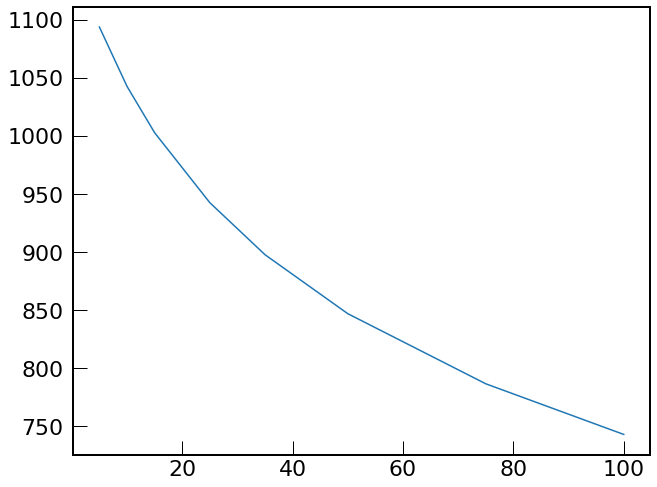

In [70]:
plt.plot(Pressures_5000K, V_Fe_5000K)

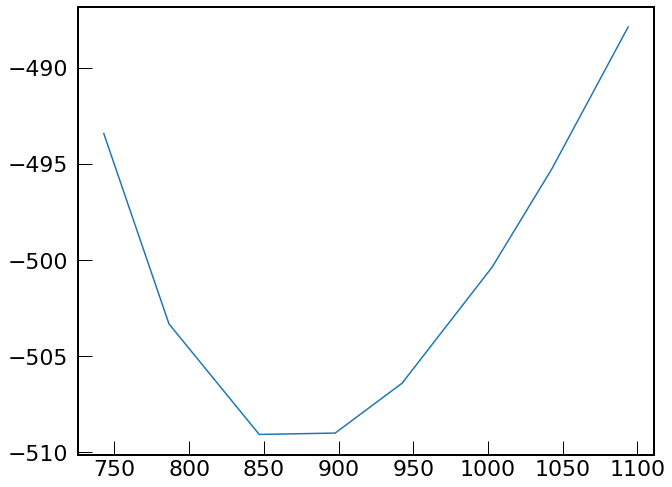

In [71]:
plt.plot(V_Fe_5000K, U_Fe_5000K)

In [72]:
import socket

s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM) 
port = 3000
hostname = '127.0.0.1'
print('Listening at {}'.format(s.getsockname())) 

Listening at ('0.0.0.0', 0)


# g(r) and n(r)

In [73]:
gr_5GPa_5000K_MgSiO3FeO = np.loadtxt("gOfR_MgSiO3FeO_5000K_5GPa.dat")
gr_15GPa_5000K_MgSiO3FeO = np.loadtxt("gOfR_MgSiO3FeO_5000K_15GPa.dat")
gr_25GPa_5000K_MgSiO3FeO = np.loadtxt("gOfR_MgSiO3FeO_5000K_25GPa.dat")
gr_50GPa_5000K_MgSiO3FeO = np.loadtxt("gOfR_MgSiO3FeO_5000K_50.1GPa.dat")
gr_75GPa_5000K_MgSiO3FeO = np.loadtxt("gOfR_MgSiO3FeO_5000K_75GPa.dat")

nr_5GPa_5000K_MgSiO3FeO = np.loadtxt("nOfR_MgSiO3PbO_5000K_5GPa.dat")
nr_15GPa_5000K_MgSiO3FeO = np.loadtxt("nOfR_MgSiO3PbO_5000K_15GPa.dat")
nr_25GPa_5000K_MgSiO3FeO = np.loadtxt("nOfR_MgSiO3PbO_5000K_25GPa.dat")
nr_50GPa_5000K_MgSiO3FeO = np.loadtxt("nOfR_MgSiO3FeO_5000K_50.1GPa.dat")
nr_75GPa_5000K_MgSiO3FeO = np.loadtxt("nOfR_MgSiO3PbO_5000K_75GPa.dat")


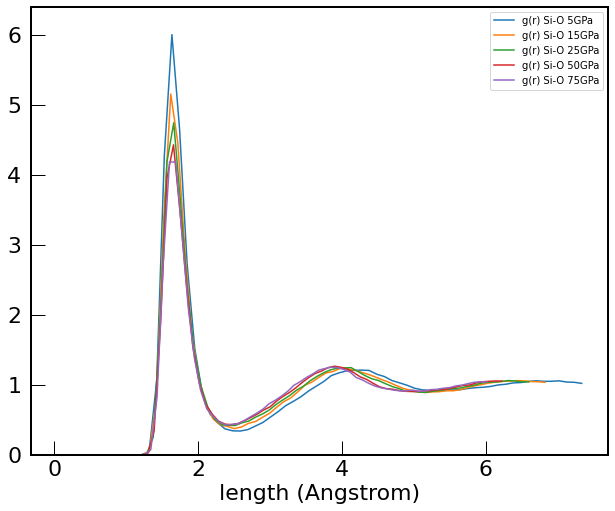

In [74]:
plt.plot(gr_5GPa_5000K_MgSiO3FeO[:,0], gr_5GPa_5000K_MgSiO3FeO[:,6], label="g(r) Si-O 5GPa")
plt.plot(gr_15GPa_5000K_MgSiO3FeO[:,0], gr_15GPa_5000K_MgSiO3FeO[:,6], label="g(r) Si-O 15GPa")
plt.plot(gr_25GPa_5000K_MgSiO3FeO[:,0], gr_25GPa_5000K_MgSiO3FeO[:,6], label="g(r) Si-O 25GPa")
plt.plot(gr_50GPa_5000K_MgSiO3FeO[:,0], gr_50GPa_5000K_MgSiO3FeO[:,6], label="g(r) Si-O 50GPa")
plt.plot(gr_75GPa_5000K_MgSiO3FeO[:,0], gr_75GPa_5000K_MgSiO3FeO[:,6], label="g(r) Si-O 75GPa")
#plt.plot(nr_50GPa_5000K[:,0], nr_50GPa_5000K[:,12], label="n(r) Si-O 50GPa")
plt.xlabel("length (Angstrom)")
plt.ylim(0,6.4)
plt.legend()

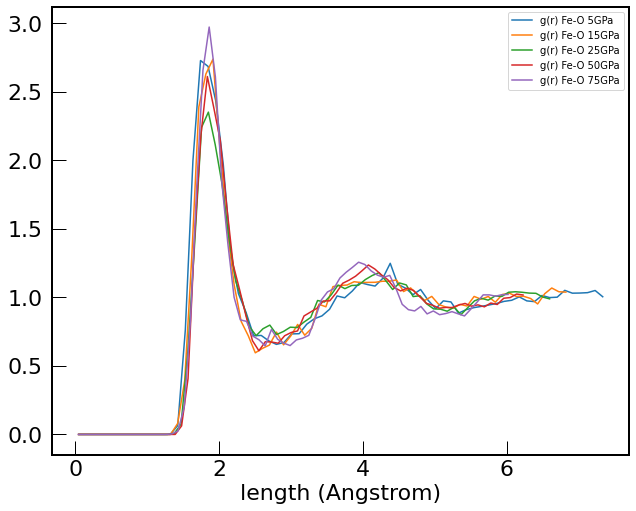

In [75]:
plt.plot( gr_5GPa_5000K_MgSiO3FeO[:,0], gr_5GPa_5000K_MgSiO3FeO[:,9], label=  "g(r) Fe-O 5GPa")
plt.plot(gr_15GPa_5000K_MgSiO3FeO[:,0], gr_15GPa_5000K_MgSiO3FeO[:,9], label="g(r) Fe-O 15GPa")
plt.plot(gr_25GPa_5000K_MgSiO3FeO[:,0], gr_25GPa_5000K_MgSiO3FeO[:,9], label="g(r) Fe-O 25GPa")
plt.plot(gr_50GPa_5000K_MgSiO3FeO[:,0], gr_50GPa_5000K_MgSiO3FeO[:,9], label="g(r) Fe-O 50GPa")
plt.plot(gr_75GPa_5000K_MgSiO3FeO[:,0], gr_75GPa_5000K_MgSiO3FeO[:,9], label="g(r) Fe-O 75GPa")
#plt.plot(nr_50GPa_5000K[:,0], nr_50GPa_5000K[:,18], label="n(r) Fe-O 50GPa")
#plt.ylim(0,6.4)
plt.xlabel("length (Angstrom)")
plt.legend()

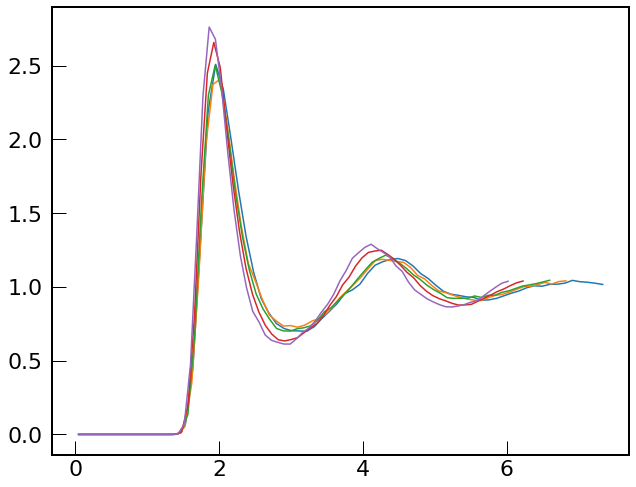

In [76]:
plt.plot( gr_5GPa_5000K_MgSiO3FeO[:,0], gr_5GPa_5000K_MgSiO3FeO[:,3], label= "g(r) Mg-O 5GPa")
plt.plot(gr_15GPa_5000K_MgSiO3FeO[:,0], gr_15GPa_5000K_MgSiO3FeO[:,3], label="g(r) Mg-O 15GPa")
plt.plot(gr_25GPa_5000K_MgSiO3FeO[:,0], gr_25GPa_5000K_MgSiO3FeO[:,3], label="g(r) Mg-O 25GPa")
plt.plot(gr_50GPa_5000K_MgSiO3FeO[:,0], gr_50GPa_5000K_MgSiO3FeO[:,3], label="g(r) Mg-O 50GPa")
plt.plot(gr_75GPa_5000K_MgSiO3FeO[:,0], gr_75GPa_5000K_MgSiO3FeO[:,3], label="g(r) Mg-O 75GPa")

In [77]:
gr_5GPa_5000K_MgSiO3PbO = np.loadtxt("gOfR_MgSiO3PbO_5000K_5GPa.dat")
gr_15GPa_5000K_MgSiO3PbO = np.loadtxt("gOfR_MgSiO3PbO_5000K_15GPa.dat")
gr_25GPa_5000K_MgSiO3PbO = np.loadtxt("gOfR_MgSiO3PbO_5000K_25GPa.dat")
gr_50GPa_5000K_MgSiO3PbO = np.loadtxt("gOfR_MgSiO3PbO_5000K_50GPa.dat")
gr_75GPa_5000K_MgSiO3PbO = np.loadtxt("gOfR_MgSiO3PbO_5000K_75GPa.dat")

nr_5GPa_5000K_MgSiO3PbO = np.loadtxt("nOfR_MgSiO3PbO_5000K_5GPa.dat")
nr_15GPa_5000K_MgSiO3PbO = np.loadtxt("nOfR_MgSiO3PbO_5000K_15GPa.dat")
nr_25GPa_5000K_MgSiO3PbO = np.loadtxt("nOfR_MgSiO3PbO_5000K_25GPa.dat")
nr_50GPa_5000K_MgSiO3PbO = np.loadtxt("nOfR_MgSiO3PbO_5000K_50GPa.dat")
nr_75GPa_5000K_MgSiO3PbO = np.loadtxt("nOfR_MgSiO3PbO_5000K_75GPa.dat")

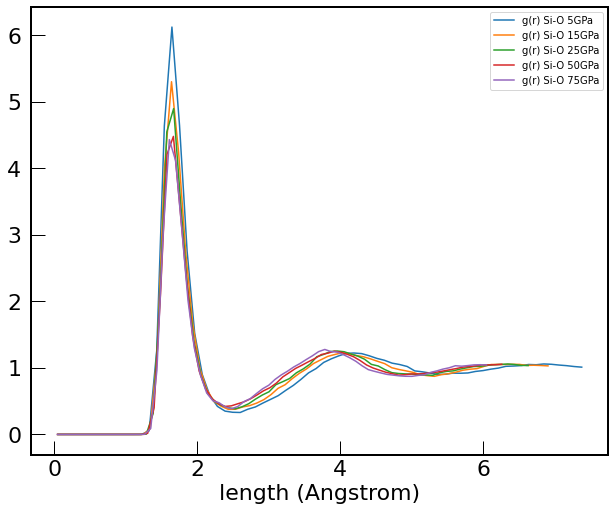

In [78]:
plt.plot(gr_5GPa_5000K_MgSiO3PbO[:,0], gr_5GPa_5000K_MgSiO3PbO[:,6], label="g(r) Si-O 5GPa")
plt.plot(gr_15GPa_5000K_MgSiO3PbO[:,0], gr_15GPa_5000K_MgSiO3PbO[:,6], label="g(r) Si-O 15GPa")
plt.plot(gr_25GPa_5000K_MgSiO3PbO[:,0], gr_25GPa_5000K_MgSiO3PbO[:,6], label="g(r) Si-O 25GPa")
plt.plot(gr_50GPa_5000K_MgSiO3PbO[:,0], gr_50GPa_5000K_MgSiO3PbO[:,6], label="g(r) Si-O 50GPa")
plt.plot(gr_75GPa_5000K_MgSiO3PbO[:,0], gr_75GPa_5000K_MgSiO3PbO[:,6], label="g(r) Si-O 75GPa")
#plt.plot(nr_50GPa_5000K[:,0], nr_50GPa_5000K[:,12], label="n(r) Si-O 50GPa")
plt.xlabel("length (Angstrom)")
#plt.xlim(0,4)
#plt.ylim(0,3)
plt.legend()

NameError: name 'find_min' is not defined

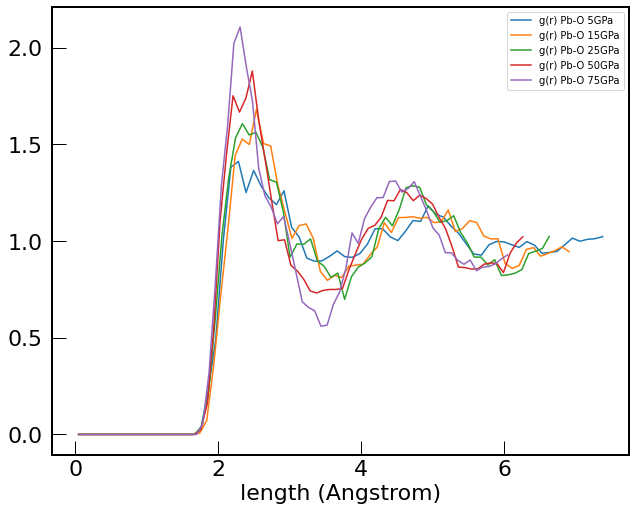

In [79]:
plt.plot(gr_5GPa_5000K_MgSiO3PbO[:,0], gr_5GPa_5000K_MgSiO3PbO[:,9], label="g(r) Pb-O 5GPa")
plt.plot(gr_15GPa_5000K_MgSiO3PbO[:,0], gr_15GPa_5000K_MgSiO3PbO[:,9], label="g(r) Pb-O 15GPa")
plt.plot(gr_25GPa_5000K_MgSiO3PbO[:,0], gr_25GPa_5000K_MgSiO3PbO[:,9], label="g(r) Pb-O 25GPa")
plt.plot(gr_50GPa_5000K_MgSiO3PbO[:,0], gr_50GPa_5000K_MgSiO3PbO[:,9], label="g(r) Pb-O 50GPa")
plt.plot(gr_75GPa_5000K_MgSiO3PbO[:,0], gr_75GPa_5000K_MgSiO3PbO[:,9], label="g(r) Pb-O 75GPa")
#plt.plot(nr_50GPa_5000K[:,0], nr_50GPa_5000K[:,12], label="n(r) Si-O 50GPa")
plt.xlabel("length (Angstrom)")


# plt.plot(nr_5GPa_5000K_MgSiO3PbO[:,0],  nr_5GPa_5000K_MgSiO3PbO[:,18], label="n(r) Pb-O 5GPa")
# plt.plot(nr_15GPa_5000K_MgSiO3PbO[:,0], nr_15GPa_5000K_MgSiO3PbO[:,18], label="n(r) Pb-O 15GPa")
# plt.plot(nr_25GPa_5000K_MgSiO3PbO[:,0], nr_25GPa_5000K_MgSiO3PbO[:,18], label="n(r) Pb-O 25GPa")
# plt.plot(nr_50GPa_5000K_MgSiO3PbO[:,0], nr_50GPa_5000K_MgSiO3PbO[:,18], label="n(r) Pb-O 50GPa")
# plt.plot(nr_75GPa_5000K_MgSiO3PbO[:,0], nr_75GPa_5000K_MgSiO3PbO[:,18], label="n(r) Pb-O 75GPa")
#plt.ylim(0,15)
plt.legend()
find_min(gr_25GPa_5000K_MgSiO3PbO[:,0], gr_25GPa_5000K_MgSiO3PbO[:,9], 2,3.9)


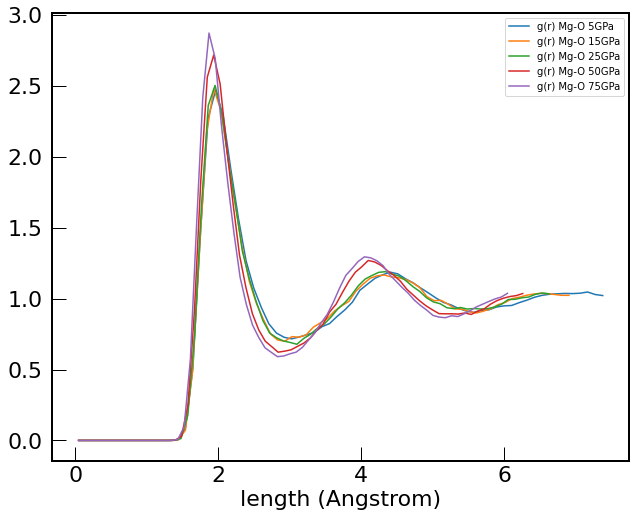

In [80]:
plt.plot(gr_5GPa_5000K_MgSiO3PbO[:,0], gr_5GPa_5000K_MgSiO3PbO[:,3], label="g(r) Mg-O 5GPa")
plt.plot(gr_15GPa_5000K_MgSiO3PbO[:,0], gr_15GPa_5000K_MgSiO3PbO[:,3], label="g(r) Mg-O 15GPa")
plt.plot(gr_25GPa_5000K_MgSiO3PbO[:,0], gr_25GPa_5000K_MgSiO3PbO[:,3], label="g(r) Mg-O 25GPa")
plt.plot(gr_50GPa_5000K_MgSiO3PbO[:,0], gr_50GPa_5000K_MgSiO3PbO[:,3], label="g(r) Mg-O 50GPa")
plt.plot(gr_75GPa_5000K_MgSiO3PbO[:,0], gr_75GPa_5000K_MgSiO3PbO[:,3], label="g(r) Mg-O 75GPa")
#plt.plot(nr_50GPa_5000K[:,0], nr_50GPa_5000K[:,12], label="n(r) Si-O 50GPa")
plt.xlabel("length (Angstrom)")
#plt.ylim(0,6.4)
plt.legend()

In [81]:
from scipy.optimize import minimize, curve_fit

In [82]:
def double_peak_Gaussian(x, a, b, mu1, mu2, sigma1, sigma2):
    return a*np.exp(-(x-mu1)**2/2/sigma1/sigma1) + b*np.exp(-(x-mu2)**2/2/sigma2/sigma2)

4.19212
1.2236


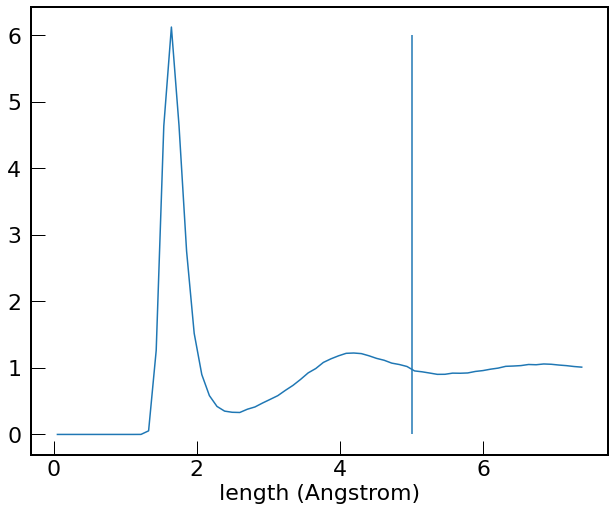

In [83]:
print(gr_5GPa_5000K_MgSiO3PbO[39,0])
print(gr_5GPa_5000K_MgSiO3PbO[39,6])
plt.plot(gr_5GPa_5000K_MgSiO3PbO[:,0], gr_5GPa_5000K_MgSiO3PbO[:,6])
plt.xlabel("length (Angstrom)")
plt.vlines(x=5,ymin=0.0, ymax=6.0)

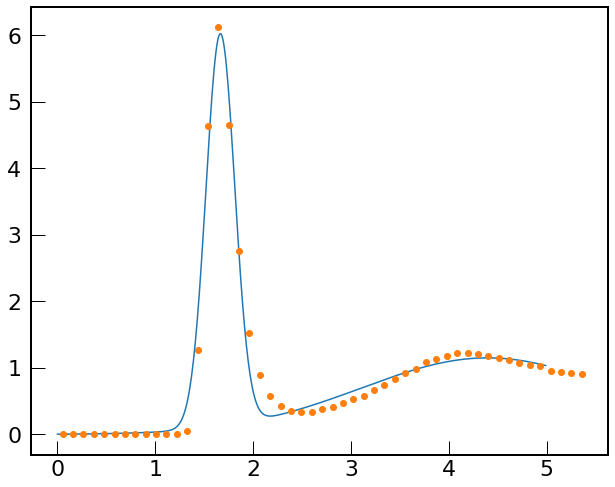

In [84]:
xfit = gr_5GPa_5000K_MgSiO3PbO[:,0]
yfit = gr_5GPa_5000K_MgSiO3PbO[:,6]
xbound = 5.5
maxind = len(xfit[xfit<xbound])
xfit = xfit[:maxind-1]
yfit = yfit[:maxind-1]
popt, pcov = curve_fit(double_peak_Gaussian, xfit, yfit, p0=(6,1.2,1.65,4.19,0.05,2))

f_fit = lambda x:double_peak_Gaussian(x, *popt)


xs = np.arange(0,5,0.01)
ys = [f_fit(x) for x in xs]
plt.plot(xs,ys)
plt.plot(xfit, yfit,'o')


In [85]:
popt

array([5.90316391, 1.15074697, 1.66539714, 4.39810002, 0.14730835,
       1.28977212])

In [86]:
def find_min(xdata, ydata, xmin=0, xmax=10):
    xs = xdata[np.logical_and(xdata > xmin, xdata < xmax)]
    ys = ydata[np.logical_and(xdata > xmin, xdata < xmax)]
    minind = np.argmin(ys)
    return xs[minind]

    

In [87]:
x_min_5GPa  = find_min(gr_5GPa_5000K_MgSiO3PbO[:,0],  gr_5GPa_5000K_MgSiO3PbO[:,6], 2,3)
x_min_15GPa = find_min(gr_15GPa_5000K_MgSiO3PbO[:,0], gr_15GPa_5000K_MgSiO3PbO[:,6], 2,3)
x_min_25GPa = find_min(gr_25GPa_5000K_MgSiO3PbO[:,0], gr_25GPa_5000K_MgSiO3PbO[:,6], 2,3)
x_min_50GPa = find_min(gr_50GPa_5000K_MgSiO3PbO[:,0], gr_50GPa_5000K_MgSiO3PbO[:,6], 2,3)
x_min_75GPa = find_min(gr_75GPa_5000K_MgSiO3PbO[:,0], gr_75GPa_5000K_MgSiO3PbO[:,6], 2,3)

In [88]:
print(x_min_5GPa)
print(x_min_15GPa)
print(x_min_25GPa)
print(x_min_50GPa)
print(x_min_75GPa)

2.60017
2.43389
2.52702
2.38599
2.47862


In [89]:
from scipy.interpolate import interp1d, splrep, splev, CubicSpline

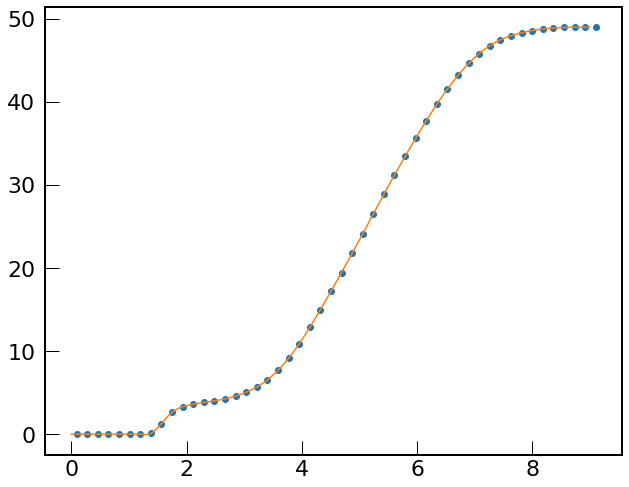

In [90]:
xfit = nr_5GPa_5000K_MgSiO3PbO[:,0]
yfit = nr_5GPa_5000K_MgSiO3PbO[:,12]
nOfr_polyfit_MgSiO3PbO_5GPa_5000K = np.poly1d(np.polyfit(xfit, yfit, 3))   
funcfit = interp1d(xfit, yfit, kind='cubic', fill_value="extrapolate")
funcfit = CubicSpline(xfit, yfit)
xs = np.arange(0,9,0.01)
ys = [funcfit(x) for x in xs]

plt.plot(nr_5GPa_5000K_MgSiO3PbO[:,0],nr_5GPa_5000K_MgSiO3PbO[:,12], 'o')
plt.plot(xs, ys)


In [91]:
def nneighbours(xmin, rs, ns):
    funcfit = CubicSpline(rs, ns)
    return (float)(funcfit(xmin))

Text(0, 0.5, '1st NN (Si-O)')

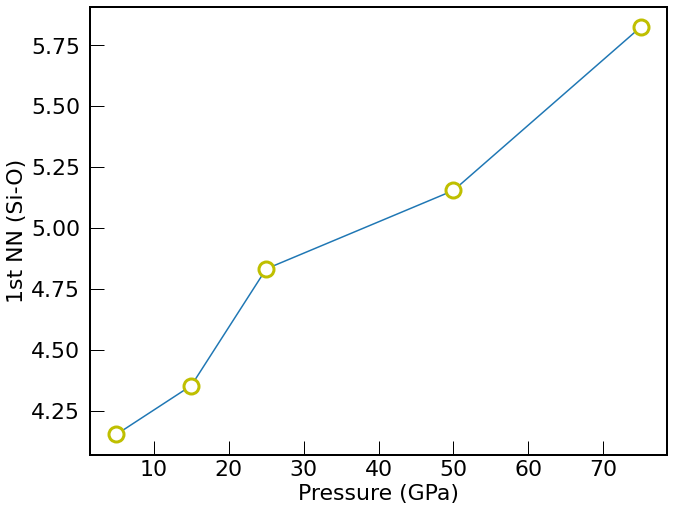

In [92]:
x_min_5GPa  = find_min(gr_5GPa_5000K_MgSiO3PbO[:,0],  gr_5GPa_5000K_MgSiO3PbO[:,6], 2,3.9)
x_min_15GPa = find_min(gr_15GPa_5000K_MgSiO3PbO[:,0], gr_15GPa_5000K_MgSiO3PbO[:,6], 2,3.9)
x_min_25GPa = find_min(gr_25GPa_5000K_MgSiO3PbO[:,0], gr_25GPa_5000K_MgSiO3PbO[:,6], 2,3.9)
x_min_50GPa = find_min(gr_50GPa_5000K_MgSiO3PbO[:,0], gr_50GPa_5000K_MgSiO3PbO[:,6], 2,3.9)
x_min_75GPa = find_min(gr_75GPa_5000K_MgSiO3PbO[:,0], gr_75GPa_5000K_MgSiO3PbO[:,6], 2,3.9)
nn_SiO = []
pressures = [5,15,25,50,75]
nn_SiO.append(nneighbours(x_min_5GPa, nr_5GPa_5000K_MgSiO3PbO[:,0], nr_5GPa_5000K_MgSiO3PbO[:,12]))
nn_SiO.append(nneighbours(x_min_15GPa, nr_15GPa_5000K_MgSiO3PbO[:,0], nr_15GPa_5000K_MgSiO3PbO[:,12]))
nn_SiO.append(nneighbours(x_min_25GPa, nr_25GPa_5000K_MgSiO3PbO[:,0], nr_25GPa_5000K_MgSiO3PbO[:,12]))
nn_SiO.append(nneighbours(x_min_50GPa, nr_50GPa_5000K_MgSiO3PbO[:,0], nr_50GPa_5000K_MgSiO3PbO[:,12]))
nn_SiO.append(nneighbours(x_min_75GPa, nr_75GPa_5000K_MgSiO3PbO[:,0], nr_75GPa_5000K_MgSiO3PbO[:,12]))

plt.plot(pressures, nn_SiO, '-o',ms=15, mfc='w', mec='y', mew=3)
plt.xlabel("Pressure (GPa)")
plt.ylabel("1st NN (Si-O)")

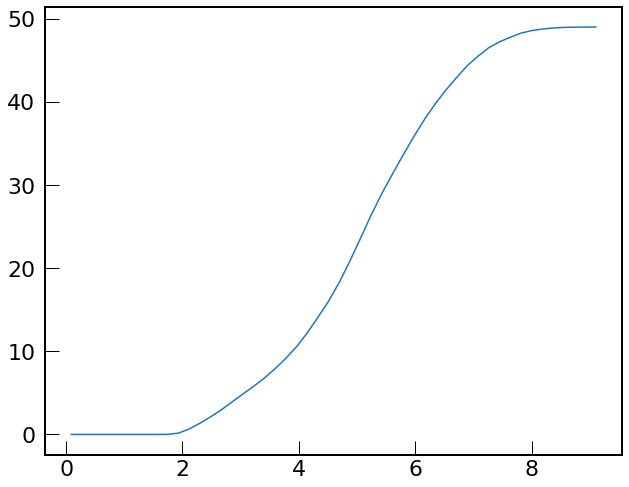

In [93]:
plt.plot(nr_5GPa_5000K_MgSiO3PbO[:,0], nr_5GPa_5000K_MgSiO3PbO[:,18])

3.34308
2.03652
3.76669
3.3764
3.43527


Text(0, 0.5, '1st NN (Pb-O)')

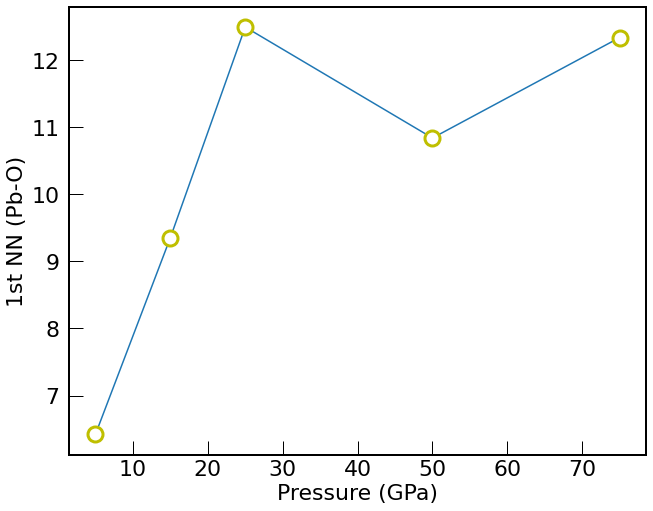

In [94]:
x_min_5GPa_Pb_O  = find_min(gr_5GPa_5000K_MgSiO3PbO[:,0],  gr_5GPa_5000K_MgSiO3PbO[:,9], 2,3.9)
x_min_15GPa_Pb_O = find_min(gr_15GPa_5000K_MgSiO3PbO[:,0], gr_15GPa_5000K_MgSiO3PbO[:,9], 2,3.9)
x_min_25GPa_Pb_O = find_min(gr_25GPa_5000K_MgSiO3PbO[:,0], gr_25GPa_5000K_MgSiO3PbO[:,9], 2,3.9)
x_min_50GPa_Pb_O = find_min(gr_50GPa_5000K_MgSiO3PbO[:,0], gr_50GPa_5000K_MgSiO3PbO[:,9], 2,3.9)
x_min_75GPa_Pb_O = find_min(gr_75GPa_5000K_MgSiO3PbO[:,0], gr_75GPa_5000K_MgSiO3PbO[:,9], 2,3.9)

print(x_min_5GPa_Pb_O)
print(x_min_15GPa_Pb_O)
print(x_min_25GPa_Pb_O)
print(x_min_50GPa_Pb_O)
print(x_min_75GPa_Pb_O)
x_min_15GPa_Pb_O = 3.5
nn_PbO = []
pressures = [5,15,25,50,75]
nn_PbO.append(nneighbours(x_min_5GPa_Pb_O,  nr_5GPa_5000K_MgSiO3PbO[:,0], nr_5GPa_5000K_MgSiO3PbO[:,18]))
nn_PbO.append(nneighbours(x_min_15GPa_Pb_O, nr_15GPa_5000K_MgSiO3PbO[:,0], nr_15GPa_5000K_MgSiO3PbO[:,18]))
nn_PbO.append(nneighbours(x_min_25GPa_Pb_O, nr_25GPa_5000K_MgSiO3PbO[:,0], nr_25GPa_5000K_MgSiO3PbO[:,18]))
nn_PbO.append(nneighbours(x_min_50GPa_Pb_O, nr_50GPa_5000K_MgSiO3PbO[:,0], nr_50GPa_5000K_MgSiO3PbO[:,18]))
nn_PbO.append(nneighbours(x_min_75GPa_Pb_O, nr_75GPa_5000K_MgSiO3PbO[:,0], nr_75GPa_5000K_MgSiO3PbO[:,18]))

plt.plot(pressures, nn_PbO, '-o',ms=15, mfc='w', mec='y', mew=3)
plt.xlabel("Pressure (GPa)")
plt.ylabel("1st NN (Pb-O)")

2.79642
2.50292
2.51489
2.55308
2.6408


Text(0, 0.5, '1st NN (Fe-O)')

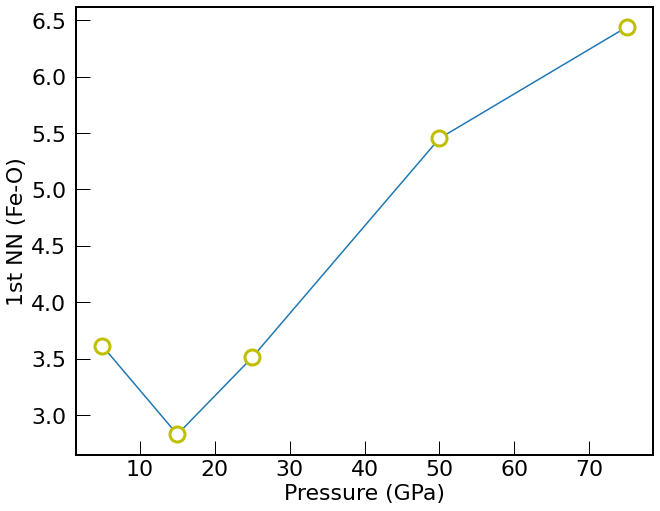

In [95]:
x_min_5GPa_Fe_O  = find_min(gr_5GPa_5000K_MgSiO3FeO[:,0],  gr_5GPa_5000K_MgSiO3FeO[:,9], 2,3.9)
x_min_15GPa_Fe_O = find_min(gr_15GPa_5000K_MgSiO3FeO[:,0], gr_15GPa_5000K_MgSiO3FeO[:,9], 2,3.9)
x_min_25GPa_Fe_O = find_min(gr_25GPa_5000K_MgSiO3FeO[:,0], gr_25GPa_5000K_MgSiO3FeO[:,9], 2,3.9)
x_min_50GPa_Fe_O = find_min(gr_50GPa_5000K_MgSiO3FeO[:,0], gr_50GPa_5000K_MgSiO3FeO[:,9], 2,3.9)
x_min_75GPa_Fe_O = find_min(gr_75GPa_5000K_MgSiO3FeO[:,0], gr_75GPa_5000K_MgSiO3FeO[:,9], 2,3.9)

print(x_min_5GPa_Fe_O)
print(x_min_15GPa_Fe_O)
print(x_min_25GPa_Fe_O)
print(x_min_50GPa_Fe_O)
print(x_min_75GPa_Fe_O)

nn_FeO = []
pressures = [5,15,25,50,75]
nn_FeO.append(nneighbours(x_min_5GPa_Fe_O,  nr_5GPa_5000K_MgSiO3PbO[:,0], nr_5GPa_5000K_MgSiO3FeO[:,18]))
nn_FeO.append(nneighbours(x_min_15GPa_Fe_O, nr_15GPa_5000K_MgSiO3PbO[:,0], nr_15GPa_5000K_MgSiO3FeO[:,18]))
nn_FeO.append(nneighbours(x_min_25GPa_Fe_O, nr_25GPa_5000K_MgSiO3PbO[:,0], nr_25GPa_5000K_MgSiO3FeO[:,18]))
nn_FeO.append(nneighbours(x_min_50GPa_Fe_O, nr_50GPa_5000K_MgSiO3PbO[:,0], nr_50GPa_5000K_MgSiO3FeO[:,18]))
nn_FeO.append(nneighbours(x_min_75GPa_Fe_O, nr_75GPa_5000K_MgSiO3PbO[:,0], nr_75GPa_5000K_MgSiO3FeO[:,18]))

plt.plot(pressures, nn_FeO, '-o',ms=15, mfc='w', mec='y', mew=3)
plt.xlabel("Pressure (GPa)")
plt.ylabel("1st NN (Fe-O)")

In [96]:
def read_EOS_intervals(filename, p_interval = (0,100), pP0=(1200, 40, 4.00), pE0=(1200, 40, 4.00, -450), pfit = True, efit=True):
    data = np.loadtxt(filename, usecols=(3,5,7,9,11,12,14,15), dtype=float) 
    N = data[0,0]
    V = data[:,1]
    rho = data[:,2]
    T = data[0][3]
    P = data[:,4]
    dP = data[:,5]
    E = data[:,6] * Ha_to_eV
    dE = data[:,7] * Ha_to_eV
    p_low, p_high = p_interval
    indices = np.logical_and(P >= p_low, P <= p_high)
    #N = N[indices]
    V = V[indices]
    rho = rho[indices]
    #T = T[indices]
    P = P[indices]
    dP = dP[indices]
    E = E[indices]
    dE = dE[indices]
    if pfit is True:
        popt_Press, pcov_Press = curve_fit(P_V_BM, V, P, p0=pP0)
        fPV = lambda v:P_V_BM(v, *popt_Press)
    else:
        fPV = None
    if efit is True:
        popt_Energy, pcov_Energy = curve_fit(E_V_BM, V, E,p0=pE0)
        fEV = lambda v:E_V_BM(v, *popt_Energy)
    else:
        fEV = None
    return V, P, dP, fPV, E, dE, fEV

def inverse(fPV):
    def fVP(P_):
        def diff(V):
            return P_ - fPV(V)
        V_tgt = fsolve(diff, x0=500)
        return V_tgt
    return fVP
    

In [97]:
array = np.arange(10)
indices = np.logical_and( (array > 2),  (array < 5) )
array = array[indices]
array

array([3, 4])

[2.52865704e+03 7.14260846e-03 4.75722622e+02]


array([27.793, 30.444, 34.84 , 38.08 , 41.467, 49.739])

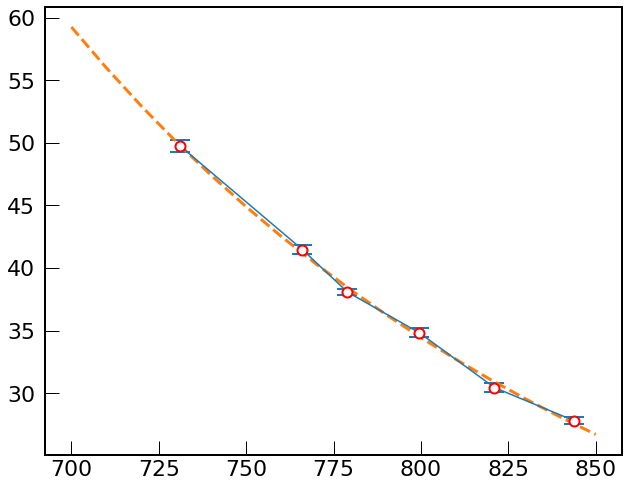

In [101]:
filename = "EOS_MgSiO3PbO_5000K.dat"
data = np.loadtxt(filename, usecols=(3,5,7,9,11,12,14,15), dtype=float) 
p_interval = (25, 50)
N = data[0,0]
V = data[:,1]
rho = data[:,2]
T = data[0][3]
P = data[:,4]
dP = data[:,5]
E = data[:,6] * Ha_to_eV
dE = data[:,7] * Ha_to_eV
p_low, p_high = p_interval
indices = np.logical_and(P >= p_low, P <= p_high)
#N = N[indices]
V = V[indices]
rho = rho[indices]
#T = T[indices]
P = P[indices]
dP = dP[indices]
E = E[indices]
dE = dE[indices]

plt.errorbar(V, P, dP, marker='o', ms=10, capsize=10, mfc='w', mec='r', mew=2)
pP0 = (2000, 0.01, 668)
popt_Press, pcov_Press = curve_fit(P_V_BM, V, P, p0=pP0, maxfev=10000)
fPV = lambda v:P_V_BM(v, *popt_Press)

vs = np.arange(700, 860, 10)
ps = [fPV(v) for v in vs]
plt.plot(vs, ps,lw=3,ls='--')
print(popt_Press)
P

[ 9.16261777e+02  3.34068506e-02 -9.98159037e+03 -4.38570074e+02]


/var/folders/lt/5qghh0r14hn1lzwzn9svyrh40000gn/T/ipykernel_41804/2297745299.py:8: RuntimeWarning: invalid value encountered in power
  E = E0 + (9*V0*K0/16)*0.006241509125883 * ( (f**(2.0/3.0)-1)**3 * K0p + (f**(2.0/3.0)-1)**2 * (6-4*(f**(2.0/3.0))))


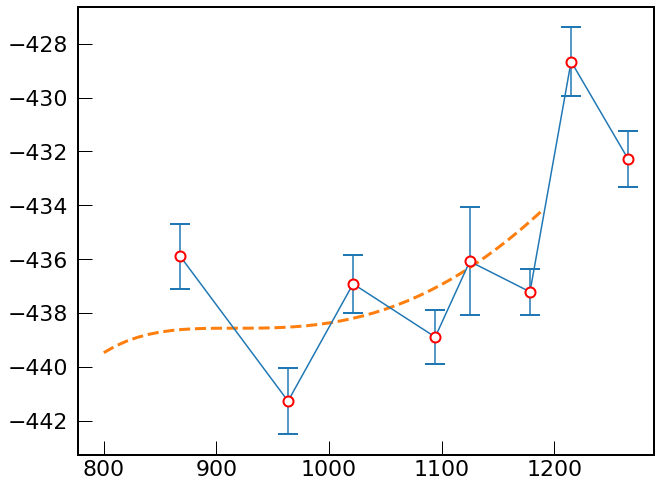

In [917]:
plt.errorbar(V, E, dE, marker='o', ms=10, capsize=10, mfc='w', mec='r', mew=2)
pE0 = (700, 0.01, 3000, -440)
popt_Energy, pcov_Energy = curve_fit(E_V_BM, V, E, p0=pE0, maxfev=10000)
fEV = lambda v:E_V_BM(v, *popt_Energy)

vs = np.arange(800,1200,10)
ps = [fEV(v) for v in vs]
plt.plot(vs, ps, ls='--', lw=3)
print(popt_Energy)

NameError: name 'P_V_BM' is not defined

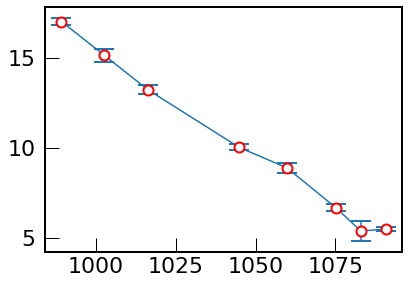

In [31]:
filename = "EOS_Fe_5000K.dat"
data = np.loadtxt(filename, usecols=(3,5,7,9,11,12,14,15), dtype=float) 
p_interval = (5, 22)
N = data[0,0]
V = data[:,1]
rho = data[:,2]
T = data[0][3]
P = data[:,4]
dP = data[:,5]
E = data[:,6] * Ha_to_eV
dE = data[:,7] * Ha_to_eV
p_low, p_high = p_interval
indices = np.logical_and(P >= p_low, P <= p_high)
#N = N[indices]
V = V[indices]
rho = rho[indices]
#T = T[indices]
P = P[indices]
dP = dP[indices]
E = E[indices]
dE = dE[indices]

plt.errorbar(V, P, dP, marker='o', ms=10, capsize=10, mfc='w', mec='r', mew=2)
pP0 = (1300, 0.01, 4000)
popt_Press, pcov_Press = curve_fit(P_V_BM, V, P, p0=pP0, maxfev=10000)
fPV = lambda v:P_V_BM(v, *popt_Press)

vs = np.arange(1000, 1100, 10)
ps = [fPV(v) for v in vs]
plt.plot(vs, ps,lw=3,ls='--')
print(popt_Press)

[ 8.29832792e+02  5.31040043e-06  3.63257925e+01 -5.05588301e+02]


/Users/wjz8597/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


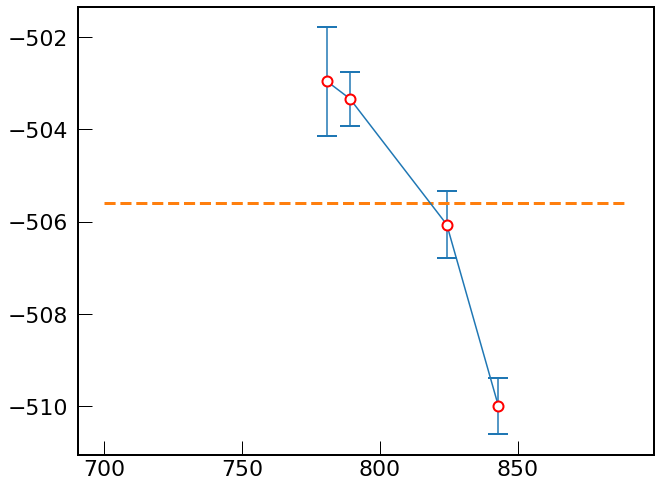

In [997]:
plt.errorbar(V, E, dE, marker='o', ms=10, capsize=10, mfc='w', mec='r', mew=2)
pE0 = (800, -0.01, 100000, -500)
popt_Energy, pcov_Energy = curve_fit(E_V_BM, V, E, p0=pE0, maxfev=10000)
fEV = lambda v:E_V_BM(v, *popt_Energy)

vs = np.arange(700,900,10)
ps = [fEV(v) for v in vs]
plt.plot(vs, ps, ls='--', lw=3)
print(popt_Energy)

# low pressure 

In [947]:
pP0 = (2000, 0.01, 668)
pE0 = (700, 0.01, 3000, -440)
V_MgSiO3FeO_5000K, P_MgSiO3FeO_5000K, dP_MgSiO3FeO_5000K, fPV_MgSiO3FeO_5000K, E_MgSiO3FeO_5000K, dE_MgSiO3FeO_5000K, fEV_MgSiO3FeO_5000K \
= read_EOS_intervals("EOS_MgSiO3FeO_5000K.dat", (5,25), pP0, pE0) 

V_MgSiO3PbO_5000K, P_MgSiO3PbO_5000K, dP_MgSiO3PbO_5000K, fPV_MgSiO3PbO_5000K, E_MgSiO3PbO_5000K, dE_MgSiO3PbO_5000K, fEV_MgSiO3PbO_5000K \
= read_EOS_intervals("EOS_MgSiO3PbO_5000K.dat", (5,25), pP0, pE0) 

# V_MgSiO3_5000K, P_MgSiO3_5000K, dP_MgSiO3_5000K, E_MgSiO3_5000K, dE_MgSiO3_5000K, fPV_MgSiO3_5000K, fEV_MgSiO3_5000K \
# = read_EOS_intervals("EOS_MgSiO3_5000K.dat", (5,25), pP0, pE0) 

fVP_MgSiO3FeO_5000K = inverse(fPV_MgSiO3FeO_5000K)
fVP_MgSiO3PbO_5000K = inverse(fPV_MgSiO3PbO_5000K)


V_Fe_5000K, P_Fe_5000K, dP_Fe_5000K, fPV_Fe_5000K, E_Fe_5000K, dE_Fe_5000K, fEV_Fe_5000K \
= read_EOS_intervals("EOS_Fe_5000K.dat", (5,25),pP0 = (1300, 0.01, 4000), pE0 = (800, 0.01, 10000, -500)) 

V_FePb_5000K, P_FePb_5000K, dP_FePb_5000K, fPV_FePb_5000K, E_FePb_5000K, dE_FePb_5000K, fEV_FePb_5000K \
= read_EOS_intervals("EOS_FePb_5000K.dat", (5,25), pP0 = (1300, 0.01, 4000), pE0 = (800, 0.01, 10000, -500)) 

fVP_Fe_5000K = inverse(fPV_Fe_5000K)
fVP_FePb_5000K = inverse(fPV_FePb_5000K)



/var/folders/lt/5qghh0r14hn1lzwzn9svyrh40000gn/T/ipykernel_41804/2297745299.py:8: RuntimeWarning: invalid value encountered in power
  E = E0 + (9*V0*K0/16)*0.006241509125883 * ( (f**(2.0/3.0)-1)**3 * K0p + (f**(2.0/3.0)-1)**2 * (6-4*(f**(2.0/3.0))))


In [872]:
fPV = lambda v:P_V_BM(v, *pP0)
fPV(800)

36.60306000529946

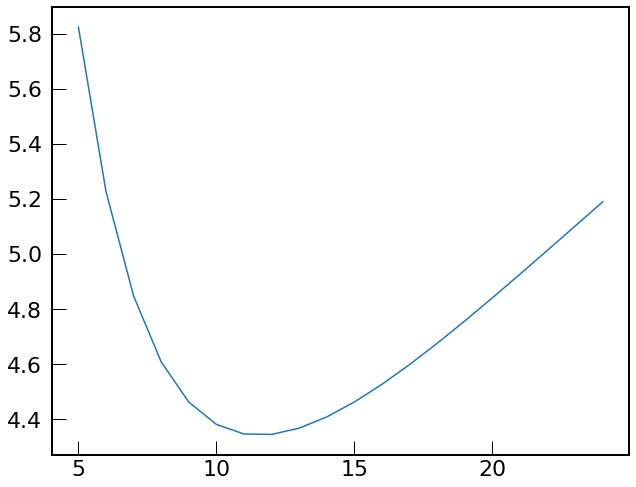

In [951]:
ps = np.arange(5,25,1)
dvs = [fVP_MgSiO3PbO_5000K(p) + fVP_Fe_5000K(p)*81/80 - fVP_MgSiO3FeO_5000K(p) - fVP_FePb_5000K(p) for p in ps]
plt.plot(ps, dvs)

# higher pressures

In [967]:
pP0 = (2000, 0.01, 668)
pE0 = (700, 0.01, 3000, -440)
V_MgSiO3FeO_5000K, P_MgSiO3FeO_5000K, dP_MgSiO3FeO_5000K, fPV_MgSiO3FeO_5000K, E_MgSiO3FeO_5000K, dE_MgSiO3FeO_5000K, fEV_MgSiO3FeO_5000K \
= read_EOS_intervals("EOS_MgSiO3FeO_5000K.dat", (25,50), pP0, pE0) 

V_MgSiO3PbO_5000K, P_MgSiO3PbO_5000K, dP_MgSiO3PbO_5000K, fPV_MgSiO3PbO_5000K, E_MgSiO3PbO_5000K, dE_MgSiO3PbO_5000K, fEV_MgSiO3PbO_5000K \
= read_EOS_intervals("EOS_MgSiO3PbO_5000K.dat", (25,50), pP0, pE0) 

# V_MgSiO3_5000K, P_MgSiO3_5000K, dP_MgSiO3_5000K, E_MgSiO3_5000K, dE_MgSiO3_5000K, fPV_MgSiO3_5000K, fEV_MgSiO3_5000K \
# = read_EOS_intervals("EOS_MgSiO3_5000K.dat", (5,25), pP0, pE0) 

fVP_MgSiO3FeO_5000K = inverse(fPV_MgSiO3FeO_5000K)
fVP_MgSiO3PbO_5000K = inverse(fPV_MgSiO3PbO_5000K)


V_Fe_5000K, P_Fe_5000K, dP_Fe_5000K, fPV_Fe_5000K, E_Fe_5000K, dE_Fe_5000K, fEV_Fe_5000K \
= read_EOS_intervals("EOS_Fe_5000K.dat", (35,50),pP0 = (1300, 0.01, 4000), pE0 = (800, 0.01, 10000, -500)) 

V_FePb_5000K, P_FePb_5000K, dP_FePb_5000K, fPV_FePb_5000K, E_FePb_5000K, dE_FePb_5000K, fEV_FePb_5000K \
= read_EOS_intervals("EOS_FePb_5000K.dat", (25,50), pP0 = (1300, 0.01, 4000), pE0 = (800, 0.01, 10000, -500)) 

fVP_Fe_5000K = inverse(fPV_Fe_5000K)
fVP_FePb_5000K = inverse(fPV_FePb_5000K)

/var/folders/lt/5qghh0r14hn1lzwzn9svyrh40000gn/T/ipykernel_41804/2297745299.py:8: RuntimeWarning: invalid value encountered in power
  E = E0 + (9*V0*K0/16)*0.006241509125883 * ( (f**(2.0/3.0)-1)**3 * K0p + (f**(2.0/3.0)-1)**2 * (6-4*(f**(2.0/3.0))))
/Users/wjz8597/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


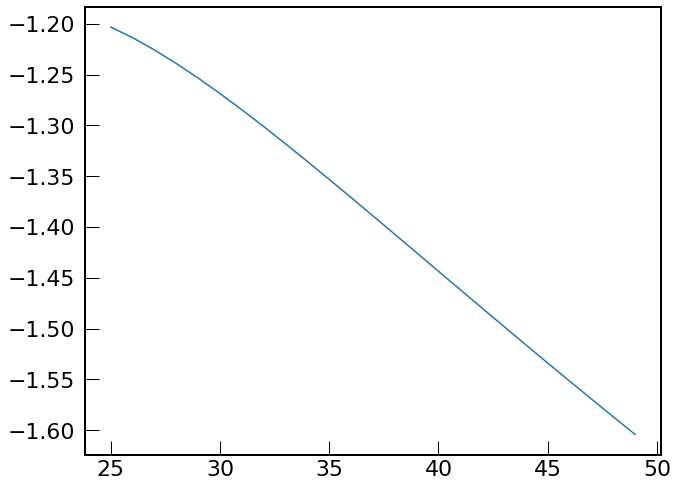

In [970]:
ps = np.arange(25,50,1)
dvs = [fVP_MgSiO3PbO_5000K(p) + fVP_Fe_5000K(p)*81/80 - fVP_MgSiO3FeO_5000K(p) - fVP_FePb_5000K(p) for p in ps]
plt.plot(ps, dvs)

In [1001]:
pP0 = (2000, 0.01, 668)
pE0 = (700, 0.01, 3000, -440)
V_MgSiO3FeO_5000K, P_MgSiO3FeO_5000K, dP_MgSiO3FeO_5000K, fPV_MgSiO3FeO_5000K, E_MgSiO3FeO_5000K, dE_MgSiO3FeO_5000K, fEV_MgSiO3FeO_5000K \
= read_EOS_intervals("EOS_MgSiO3FeO_5000K.dat", (50,100), pP0, pE0) 

V_MgSiO3PbO_5000K, P_MgSiO3PbO_5000K, dP_MgSiO3PbO_5000K, fPV_MgSiO3PbO_5000K, E_MgSiO3PbO_5000K, dE_MgSiO3PbO_5000K, fEV_MgSiO3PbO_5000K \
= read_EOS_intervals("EOS_MgSiO3PbO_5000K.dat", (25,100), pP0, pE0) 

# V_MgSiO3_5000K, P_MgSiO3_5000K, dP_MgSiO3_5000K, E_MgSiO3_5000K, dE_MgSiO3_5000K, fPV_MgSiO3_5000K, fEV_MgSiO3_5000K \
# = read_EOS_intervals("EOS_MgSiO3_5000K.dat", (5,25), pP0, pE0) 

fVP_MgSiO3FeO_5000K = inverse(fPV_MgSiO3FeO_5000K)
fVP_MgSiO3PbO_5000K = inverse(fPV_MgSiO3PbO_5000K)


V_Fe_5000K, P_Fe_5000K, dP_Fe_5000K, fPV_Fe_5000K, E_Fe_5000K, dE_Fe_5000K, fEV_Fe_5000K \
= read_EOS_intervals("EOS_Fe_5000K.dat", (50,100),pP0 = (1300, 0.01, 4000), pE0 = (800, 0.01, 10000, -500)) 

V_FePb_5000K, P_FePb_5000K, dP_FePb_5000K, fPV_FePb_5000K, E_FePb_5000K, dE_FePb_5000K, fEV_FePb_5000K \
= read_EOS_intervals("EOS_FePb_5000K.dat", (50,100), pP0 = (1300, 0.01, 4000), pE0 = (800, 0.01, 10000, -500), efit=False) 

fVP_Fe_5000K = inverse(fPV_Fe_5000K)
fVP_FePb_5000K = inverse(fPV_FePb_5000K)

/var/folders/lt/5qghh0r14hn1lzwzn9svyrh40000gn/T/ipykernel_41804/2297745299.py:8: RuntimeWarning: invalid value encountered in power
  E = E0 + (9*V0*K0/16)*0.006241509125883 * ( (f**(2.0/3.0)-1)**3 * K0p + (f**(2.0/3.0)-1)**2 * (6-4*(f**(2.0/3.0))))


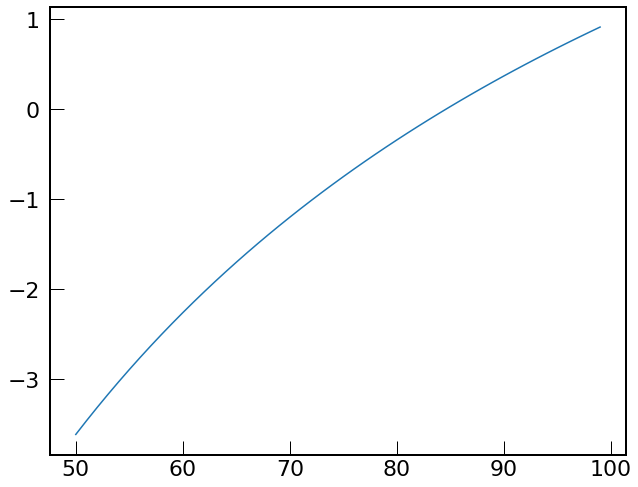

In [1005]:
ps = np.arange(50,100,1)
dvs = [fVP_MgSiO3PbO_5000K(p) + fVP_Fe_5000K(p)*81/80 - fVP_MgSiO3FeO_5000K(p) - fVP_FePb_5000K(p) for p in ps]
plt.plot(ps, dvs)